In [1]:
# version control
# model38 final_capstone_talkingdata_0603-device EDA
# model38 final_capstone_talkingdata_0605 -EDA geo
# model38 final_capstone_talkingdata_0607 -EDA-timestamp
# model38 final_capstone_talkingdata_0611 -EDA-app


In [2]:
# original dataset (to work on)

# gender_age_train.csv
# phone_brand_device_model.csv
# events.csv
# app_events.csv
# app_labels.csv
# label_categories.csv

In [3]:
# intermediate dataset (to work on)

# brand_parse.csv
# model_parse.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
RANDOM_STATE = 2020

In [6]:
from mpl_toolkits.basemap import Basemap

# load data

# gender_age_train.csv

In [7]:
df_gender_age_train = pd.read_csv('./talkingdata-mobile-user-demographics/gender_age_train.csv')
df_gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [8]:
df_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [9]:
# modified the dataframe

# problem:
# the group columns have 12 different classes, that can be too many 
# many deivce_id do not appear in events dataset (i.e. events.csv), we don't have enough data to train

# solution:
# add a new column called 'age-cate' only designated to age group
# only focus those deviced_id have associated events records. 
#     (otherwise we can only predict (guess) user group based on device. ML should not become magic)

# phone_brand_device_model.csv

In [10]:
df_phone_brand_device_model = pd.read_csv('./talkingdata-mobile-user-demographics/phone_brand_device_model.csv')
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [11]:
# df_phone_brand_device_model.isna().any()
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187245 entries, 0 to 187244
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device_id     187245 non-null  int64 
 1   phone_brand   187245 non-null  object
 2   device_model  187245 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [12]:
# parse the model

# problem:
# exist names in Chinese (hard to display)
# very sparse data (too many brands and models)

# solution:
# change chinese into english
# trim the number of phone devices.

# I have done it for you

In [13]:
df_brand = pd.read_csv('./talkingdata-mobile-user-demographics/brand_parse.csv')
df_brand.head()

,brand_original,brand_parse
0,小米,Xiaomi
1,三星,Samsung
2,SUGAR,SUGAR
3,华为,Huawei
4,vivo,vivo


In [14]:
df_model = pd.read_csv('./talkingdata-mobile-user-demographics/model_parse.csv')
df_model.head()

,model_original,model_parse
0,红米,Red rice
1,MI 2,MI 2
2,Galaxy S4,Galaxy S4
3,时尚手机,Fashion phones
4,Galaxy Note 2,Galaxy Note 2


In [15]:
# merge to the original device
df_phone_brand_device_model_parse = df_phone_brand_device_model.copy()
# df_parse

df_phone_brand_device_model_parse = pd.merge( left=df_phone_brand_device_model_parse,
                   right=df_brand,
                   how = 'left',
                   left_on='phone_brand', right_on='brand_original')
df_phone_brand_device_model_parse = pd.merge( left=df_phone_brand_device_model_parse,
                   right=df_model,
                   how = 'left',
                   left_on='device_model', right_on='model_original')

df_phone_brand_device_model_parse = df_phone_brand_device_model_parse.drop(['brand_original', 'model_original'], axis=1)
df_phone_brand_device_model_parse.head()

,device_id,phone_brand,device_model,brand_parse,model_parse
0,-8890648629457979026,小米,红米,Xiaomi,Red rice
1,1277779817574759137,小米,MI 2,Xiaomi,MI 2
2,5137427614288105724,三星,Galaxy S4,Samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机,SUGAR,Fashion phones
4,-5019277647504317457,三星,Galaxy Note 2,Samsung,Galaxy Note 2


# events.csv

In [16]:
df_events = pd.read_csv('./talkingdata-mobile-user-demographics/events.csv')
df_events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [17]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  int64  
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 124.1+ MB


In [18]:
df_events.device_id.nunique()

60865

# modified table

### problem:
- (as mentioned before: not every device_id in training set has event_id, but we will only focus those have event_id)
-  timestamp is hard to use, need ot parse to hour, day of week, etc.

# intermediate comments
- the three nested original dataframes are df_events, df_phone_brand_device_model_parse (df_phone_brand_device_model) and df_gender_age_train, with device_id as the primary key.
- while df_events can cross-table with other original dataframe using a chain of keys, i.e. event_id, app_id, etc.
- So, it is possible we will prepare two sets of data, one with phone_device info, the other one without
- now, let's check how many data we can expect them to overlap.

In [19]:
print('train: ', df_gender_age_train.device_id.nunique())
print('device: ', df_phone_brand_device_model_parse.device_id.nunique())
print('events: ', df_events.device_id.nunique())

train:  74645
device:  186716
events:  60865


In [20]:
print('train-device: ', len(np.intersect1d(df_gender_age_train.device_id.unique(), df_phone_brand_device_model_parse.device_id.unique())))
print('train-events: ', len(np.intersect1d(df_gender_age_train.device_id.unique(), df_events.device_id.unique())))
print('all: ', len(np.intersect1d(np.intersect1d(df_phone_brand_device_model_parse.device_id.unique(), 
                                                 df_events.device_id.unique()),
                                 df_gender_age_train.device_id.unique())))

train-device:  74645
train-events:  23309
all:  23309


In [21]:
df_gender_age_train

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


In [22]:
df_phone_brand_device_model_parse

,device_id,phone_brand,device_model,brand_parse,model_parse
0,-8890648629457979026,小米,红米,Xiaomi,Red rice
1,1277779817574759137,小米,MI 2,Xiaomi,MI 2
2,5137427614288105724,三星,Galaxy S4,Samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机,SUGAR,Fashion phones
4,-5019277647504317457,三星,Galaxy Note 2,Samsung,Galaxy Note 2
...,...,...,...,...,...
187240,7979541072208733273,小米,MI 4,Xiaomi,MI 4
187241,-187404680852357705,小米,红米2,Xiaomi,Red Rice 2
187242,-2718274279595622821,小米,MI 3,Xiaomi,MI 3
187243,3098391762071677791,vivo,X1,vivo,X1


In [23]:
df_events

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66
...,...,...,...,...,...
3252945,3252946,-8995272658520685777,2016-05-07 23:14:17,0.00,0.00
3252946,3252947,6790350461641275817,2016-05-07 23:14:08,120.65,27.78
3252947,3252948,7111660304904287709,2016-05-07 23:35:33,121.40,31.18
3252948,3252949,2786044170600788970,2016-05-07 23:36:03,111.19,31.29


# Start cross-table for the first time (pd.merge)
### also modify the table
- add new columns
- trim the number of categorical data classes

In [24]:
# df_merge_phone_brand_device_model = pd.merge(left=df_phone_brand_device_model_parse[['device_id', 'brand_parse', 'model_parse']],
#                                             right=df_gender_age_train,
#                                             how = 'inner',
#                                             on='device_id',)
# df_merge_phone_brand_device_model.head()

In [25]:
# later on we will find out only part deviced_id have associated events, let's call such id foucs id,
# df_merge_phone_brand_device_model_focus
df_merge_phone_brand_device_model_focus = pd.merge(left=df_phone_brand_device_model_parse[df_phone_brand_device_model_parse.device_id.isin(df_events.device_id)]\
                                                   [['device_id', 'brand_parse', 'model_parse']],
                                            right=df_gender_age_train,
                                            how = 'inner',
                                            on='device_id',)
df_merge_phone_brand_device_model_focus.head()

,device_id,brand_parse,model_parse,gender,age,group
0,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31
1,773248989809697210,vivo,X5Pro,M,20,M22-
2,-5913071468598874323,Samsung,S7566,M,40,M39+
3,375031242916141301,Sony,Xperia Z,M,32,M32-38
4,-1025284795963440768,Samsung,Galaxy Note 2,M,56,M39+


In [26]:
df_merge_phone_brand_device_model_focus.device_id.nunique()

23309

In [27]:
# df_merge_phone_focus_cuttail
# for this df, we add new column 'brand_model', which is combination of brand and model
df_tmp_2 = df_merge_phone_brand_device_model_focus\
    .groupby(['brand_parse','model_parse'])['age'].count().sort_values(ascending=False)
(df_tmp_2/df_tmp_2.sum()).cumsum()[0:30]


list_test = [[item[0], item[1]] for item in df_tmp_2[:100].index]
df_test = pd.DataFrame(list_test)
df_test.columns=['brand_parse', 'model_parse']

df_test['brand_model'] = df_test[['brand_parse', 'model_parse']].agg('-'.join, axis=1)
df_test


parse_list = [np.arange(100,150), np.arange(150,200), np.arange(200,250), np.arange(250,len(df_tmp_2))]
df_test2 = pd.DataFrame()
for i,range_ in enumerate(parse_list):
    if i != len(parse_list)-1:
        list_tmp = [[item[0], item[1], 'top'+ str(range_[-1]+1)+'model'] for item in df_tmp_2[range_].index]
    else:
        list_tmp = [[item[0], item[1], 'other_model'] for item in df_tmp_2[range_].index]
#     list_test.append(np.array(list_tmp).ravel().reshape(-1,3))
    df_test2 = pd.concat([df_test2,
                         pd.DataFrame(list_tmp)], ignore_index=True)

df_test2.columns = df_test.columns
df_test2

df_model_rename = pd.concat([df_test,df_test2], axis=0, ignore_index=True)
df_model_rename


,brand_parse,model_parse,brand_model
0,Xiaomi,Red rice note,Xiaomi-Red rice note
1,Xiaomi,MI 4,Xiaomi-MI 4
2,Samsung,Galaxy Note 3,Samsung-Galaxy Note 3
3,Huawei,Glory 6,Huawei-Glory 6
4,Xiaomi,MI 3,Xiaomi-MI 3
...,...,...,...
937,Lenovo,A388t,other_model
938,Lenovo,A398t,other_model
939,Lenovo,A516,other_model
940,Lenovo,A630t,other_model


In [28]:
df_tmp = df_merge_phone_brand_device_model_focus.groupby('brand_parse')['age'].agg('count').sort_values(ascending=False)
brand_top20_list = df_tmp.index[:20]
brand_top10_list = df_tmp.index[:10]
brand_top5_list = df_tmp.index[:5]
brand_top20_list

df_merge_phone_focus_cuttail = df_merge_phone_brand_device_model_focus.copy()
# df_merge_phone_focus_cuttail
# df_merge_phone_focus_cuttail

df_merge_phone_focus_cuttail = pd.merge(left=df_merge_phone_focus_cuttail,
         right=df_model_rename,
         how='inner',
         on=['brand_parse', 'model_parse']
        )
df_merge_phone_focus_cuttail['brand_cuttail'] = df_merge_phone_focus_cuttail.brand_parse.apply(lambda x: x if x in (brand_top20_list) else "other")
df_merge_phone_focus_cuttail['brand_cuttail_10'] = df_merge_phone_focus_cuttail.brand_parse.apply(lambda x: x if x in (brand_top10_list) else "other")
df_merge_phone_focus_cuttail['brand_cuttail_5'] = df_merge_phone_focus_cuttail.brand_parse.apply(lambda x: x if x in (brand_top5_list) else "other")

df_merge_phone_focus_cuttail.head()

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5
0,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi
1,3012101383831426267,Xiaomi,MI One Plus,F,30,F29-32,other_model,Xiaomi,Xiaomi,Xiaomi
2,-5582167608981702351,Xiaomi,MI One Plus,M,27,M27-28,other_model,Xiaomi,Xiaomi,Xiaomi
3,-4352089428281357293,Xiaomi,MI One Plus,M,28,M27-28,other_model,Xiaomi,Xiaomi,Xiaomi
4,-8073713984729393600,Xiaomi,MI One Plus,F,27,F27-28,other_model,Xiaomi,Xiaomi,Xiaomi


In [29]:
for col in df_merge_phone_focus_cuttail.columns[1:]:
    print (col, df_merge_phone_focus_cuttail[col].nunique())

brand_parse 89
model_parse 926
gender 2
age 78
group 12
brand_model 104
brand_cuttail 21
brand_cuttail_10 11
brand_cuttail_5 6


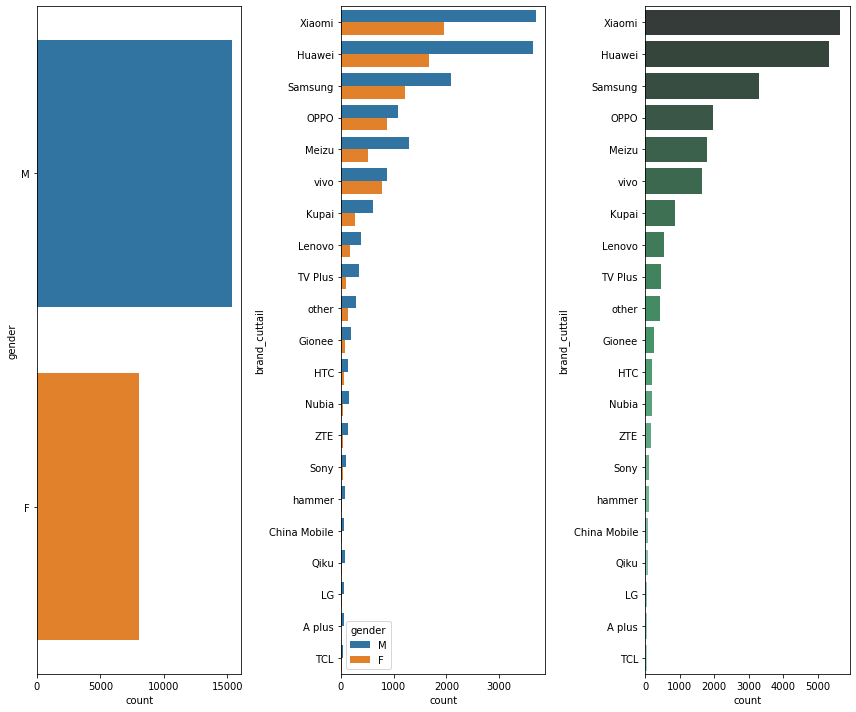

In [30]:
# visualization:
# gender count/proportion (portion part will use stack-plot later)
order_tmp = df_merge_phone_focus_cuttail.groupby('brand_cuttail').device_id.agg('count').sort_values(ascending=False).index
fig, ax = plt.subplots(1,3,figsize=(12,10))

sns.countplot(y=df_merge_phone_focus_cuttail.gender,
             ax=ax[0])

sns.countplot(data=df_merge_phone_focus_cuttail,
              y='brand_cuttail', 
              hue='gender',
#               palette='Set1', 
              order = order_tmp, ax=ax[1])
sns.countplot(data=df_merge_phone_focus_cuttail,
              y='brand_cuttail', 
#               hue='gender',
              palette='BuGn_d', 
              order = order_tmp, ax=ax[2])
plt.tight_layout()
plt.show()

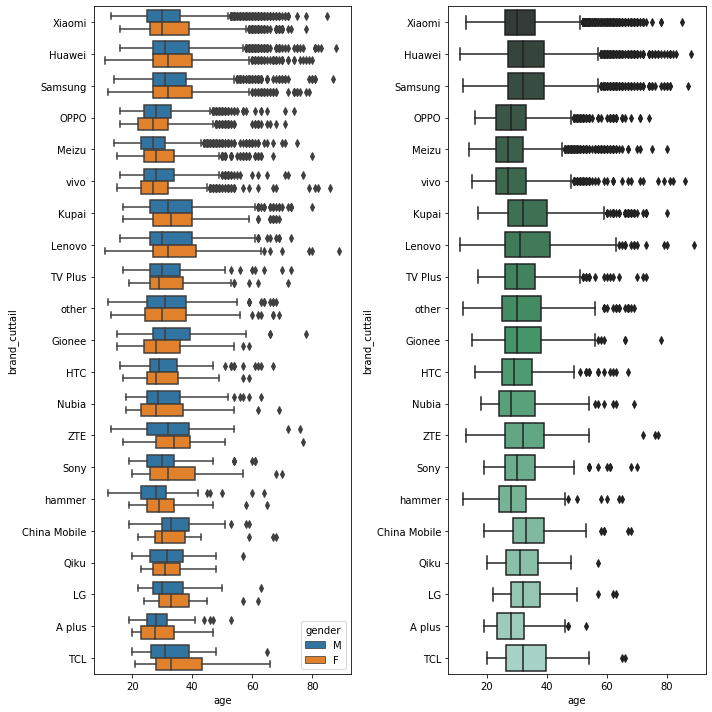

In [31]:
# age distribution boxplot

order_tmp = df_merge_phone_focus_cuttail.groupby('brand_cuttail').device_id.agg('count').sort_values(ascending=False).index
fig, ax = plt.subplots(1,2,figsize=(10,10))
sns.boxplot(data=df_merge_phone_focus_cuttail, x='age', y='brand_cuttail' , 
            order=order_tmp, 
            hue='gender', ax=ax[0])
sns.boxplot(data=df_merge_phone_focus_cuttail, x='age', y='brand_cuttail',
            order=order_tmp, 
            palette='BuGn_d', ax=ax[1])
plt.tight_layout()
plt.show()

In [32]:
# create a new col called 'age_cate'
df_age_cate_link = pd.DataFrame({'group':np.sort(df_gender_age_train.group.unique())})
df_age_cate_link['age_cate'] = ['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+'] * 2
df_age_cate_link

df_age_cate_link.age_cate.unique()

array(['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+'],
      dtype=object)

In [33]:
df_merge_phone_focus_cuttail_newgrp = pd.merge(left=df_merge_phone_focus_cuttail,
                                       right=df_age_cate_link,
                                       how='inner',
                                       on='group')
df_merge_phone_focus_cuttail_newgrp.head()

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate
0,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31
1,9127764357931097305,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31
2,1938498014635642053,vivo,X5Pro,M,31,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31
3,-3178958522047733033,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31
4,-661674373703931011,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31


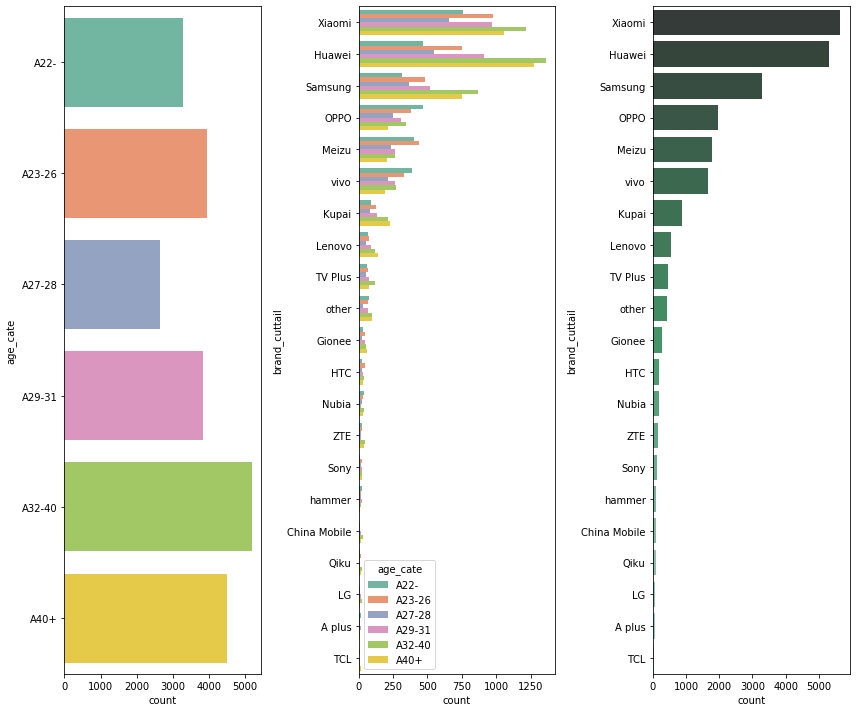

In [34]:
# I normally like to plot all three together to represent the nested relationship
# age-cate countplot

order_tmp = df_merge_phone_focus_cuttail.groupby('brand_cuttail').device_id.agg('count').sort_values(ascending=False).index
fig, ax = plt.subplots(1,3,figsize=(4*3,10))

sns.countplot(data=df_merge_phone_focus_cuttail_newgrp,
              y='age_cate',
#               x='gender',
#               hue='gender'              
              order=df_age_cate_link.age_cate.unique(),
             palette='Set2',
              ax=ax[0]
             )

sns.countplot(data =df_merge_phone_focus_cuttail_newgrp, y='brand_cuttail', 
              order=order_tmp,     
              palette='Set2',
              hue='age_cate', hue_order=df_age_cate_link.age_cate.unique(),
              ax=ax[1])

sns.countplot(data=df_merge_phone_focus_cuttail,
              y='brand_cuttail', 
#               hue='gender',
              palette='BuGn_d', 
              order = order_tmp, ax=ax[2])

plt.tight_layout()
plt.show()

# another merge
### GEO info
### timestamp

In [35]:
df_merge_phone_events_focus = pd.merge(left=df_merge_phone_focus_cuttail_newgrp,
                        right=df_events,
                        how = 'inner',
                        on='device_id',
        )
# df_merge_phone_events_focus_copy = df_merge_phone_events_focus.copy()
df_merge_phone_events_focus.head()

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate,event_id,timestamp,longitude,latitude
0,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,69136,2016-05-02 06:24:55,0.0,0.0
1,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,174606,2016-05-01 00:31:24,0.0,0.0
2,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,243296,2016-05-02 06:21:29,0.0,0.0
3,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,784955,2016-05-05 06:37:57,0.0,0.0
4,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,1001397,2016-05-01 00:34:21,0.0,0.0


In [36]:
df_merge_phone_events_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220474 entries, 0 to 1220473
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   device_id         1220474 non-null  int64  
 1   brand_parse       1220474 non-null  object 
 2   model_parse       1220474 non-null  object 
 3   gender            1220474 non-null  object 
 4   age               1220474 non-null  int64  
 5   group             1220474 non-null  object 
 6   brand_model       1220474 non-null  object 
 7   brand_cuttail     1220474 non-null  object 
 8   brand_cuttail_10  1220474 non-null  object 
 9   brand_cuttail_5   1220474 non-null  object 
 10  age_cate          1220474 non-null  object 
 11  event_id          1220474 non-null  int64  
 12  timestamp         1220474 non-null  object 
 13  longitude         1220474 non-null  float64
 14  latitude          1220474 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage:

# GEO info

I like geo data. it is kinda hard to handel them, but it often show vivid visualization.

first sight about geo-data is that there exist a lot of 0. I don't think those make sense. Such 0 GPS data is normally hard to fill-na. (I will take a deeper look into it and confirm that's the case. i.e. check if the deviced_id assocaited to the zero-GPS ever had GPS record).
Note that, zero-GPS data also contributed a large proportion of the data (i.e. 30%). We probabely need to consider adaptive model to handel the target. i.e. one model use GPS data with less rows, another one without GPS data but with full rows (since GPS data is not easy to use anyways).
Last but not least, the zero-GPS records might still have prediction power, i.e. for some reason users from certain group are likely to disable GPS function, thus no GPS data for them. This is similar to the outliers data, it is possible that those customers were traveling abroad or it could be errors.
For now, let's first have some analysis on mainland china. (roughly long:[70,150],lat:[10,50]

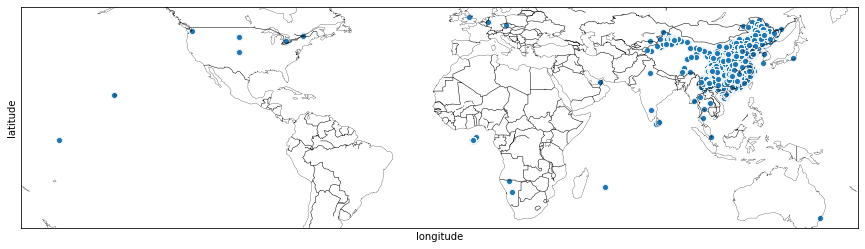

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(15,15), 
#                          gridspec_kw={'width_ratios': [3, 1]}
                        )

sns.scatterplot(df_merge_phone_events_focus.longitude,
               df_merge_phone_events_focus.latitude,
               ax=ax)
# ax.get_xlim()
# ax.get_ylim()
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, ax=ax)

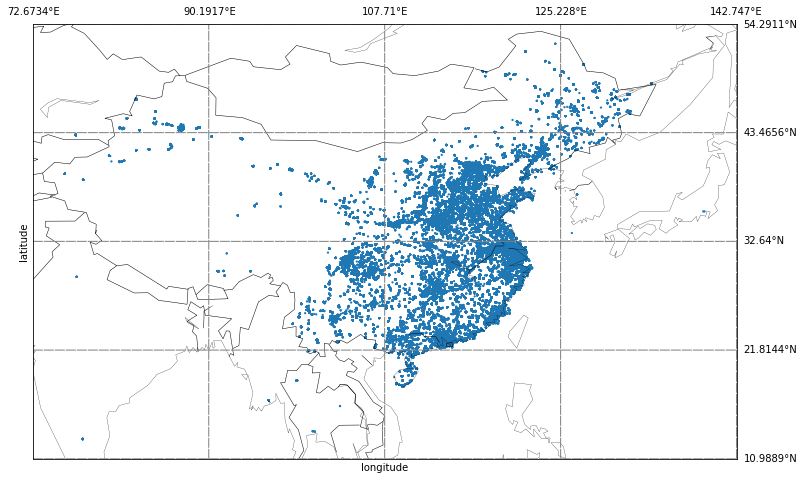

In [38]:
# focus on mainland china
fig, ax = plt.subplots(1,1, figsize=(15,8))
df_merge_phone_events_focus_mainland = df_merge_phone_events_focus[(df_merge_phone_events_focus.longitude>70) &
                            (df_merge_phone_events_focus.longitude<150)&
                            (df_merge_phone_events_focus.latitude>10) &
                            (df_merge_phone_events_focus.latitude<60)]
# df_merge_phone_events_focus_mainland.info()

# fig, ax = plt.subplots(1, 1, figsize=(15,15), 
#                          gridspec_kw={'width_ratios': [3, 1]}
#                         )

sns.scatterplot(data = df_merge_phone_events_focus_mainland,
                x='longitude',
                y='latitude',
                s=5,
                edgecolor ='none',      
                ax=ax)
# ax.get_xlim()
# ax.get_ylim()
# Initialize the map
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')


plt.show()

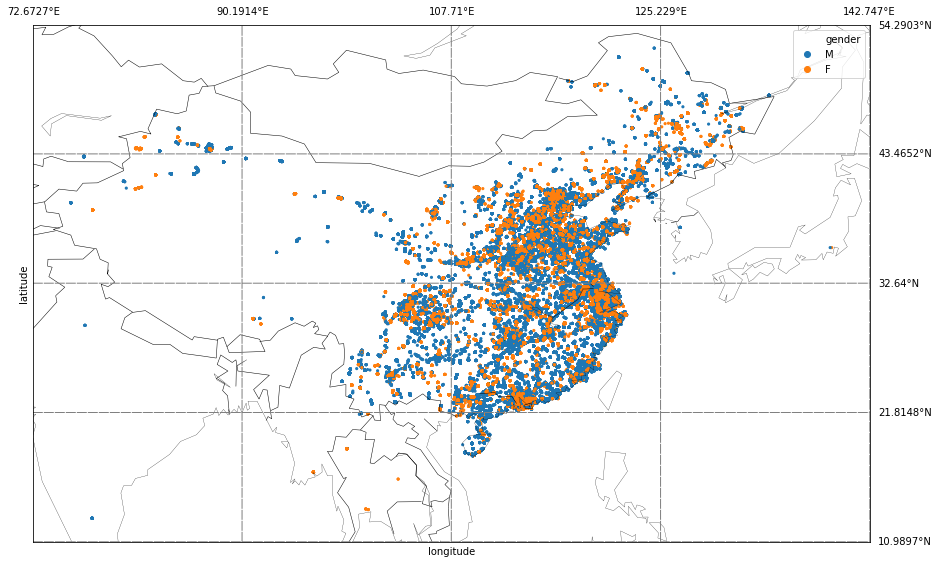

In [39]:
# what about the gender group?
fig, ax = plt.subplots(figsize=(15,15))



sns.scatterplot(data=df_merge_phone_events_focus_mainland,
                x='longitude',
                y='latitude',
                hue='gender',
#                 hue_order=np.append(order_tmp[:len(df_merge_phone_events_focus_mainland.brand_cuttail_5.unique())].values, 'other'),
#                 palette='Set2',
                edgecolor ='none',                
#                 alpha=0.005,
                s=10,
                ax=ax)

# Initialize the map
# map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
 
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, ax=ax)


meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')


plt.show()

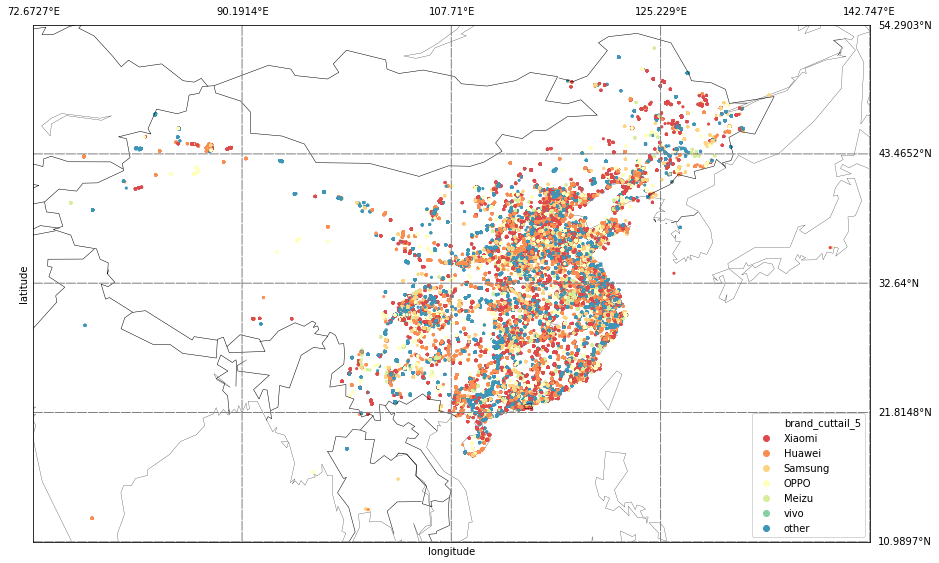

In [40]:
# another intersting to see the activity locations associated with brand (top 5 brand here)
# TIPS: for multiple color plot, don't use alpha, also you might want get rid of the edgecolor
# a little bit overwhelming, but it is what it is.
fig, ax = plt.subplots(figsize=(15,15))




sns.scatterplot(data=df_merge_phone_events_focus_mainland,
                x='longitude',
                y='latitude',
                hue='brand_cuttail_5',
                hue_order=np.append(order_tmp[:len(df_merge_phone_events_focus_mainland.brand_cuttail_5.unique())].values, 'other'),
                palette='Spectral',
#                 alpha=0.005,
                s=10,
                edgecolor ='none',
                ax=ax)

# Initialize the map
# map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
# map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
#               llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')

plt.show()

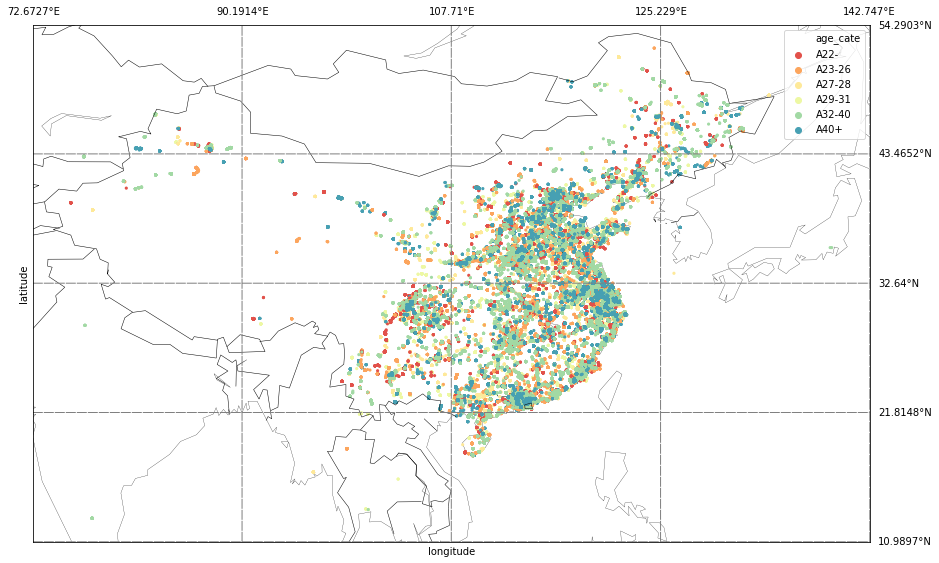

In [41]:
# last but not least age-cate
fig, ax = plt.subplots(figsize=(15,15))

sns.scatterplot(data=df_merge_phone_events_focus_mainland,
                x='longitude',
                y='latitude',
                hue='age_cate',
                hue_order=df_age_cate_link.age_cate.unique(),
                palette='Spectral',
                edgecolor ='none',                
#                 alpha=0.005,
                s=10,
                ax=ax)

# Initialize the map
# map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')


plt.show()

## comment
- I don't think there is a very clear trend where certain target group users locate. 
- Also, note that since certain user group might have larger polupation to start with, when visualize user group using scatterplot we should consider such reason. We might also want normalize the event number per area
- another very important thing is the geo info analysis is based on event instead of users, i.e. many event can assocaite to the same users.

### let's go personal
- most events individuals
- individuals travel the longest distance

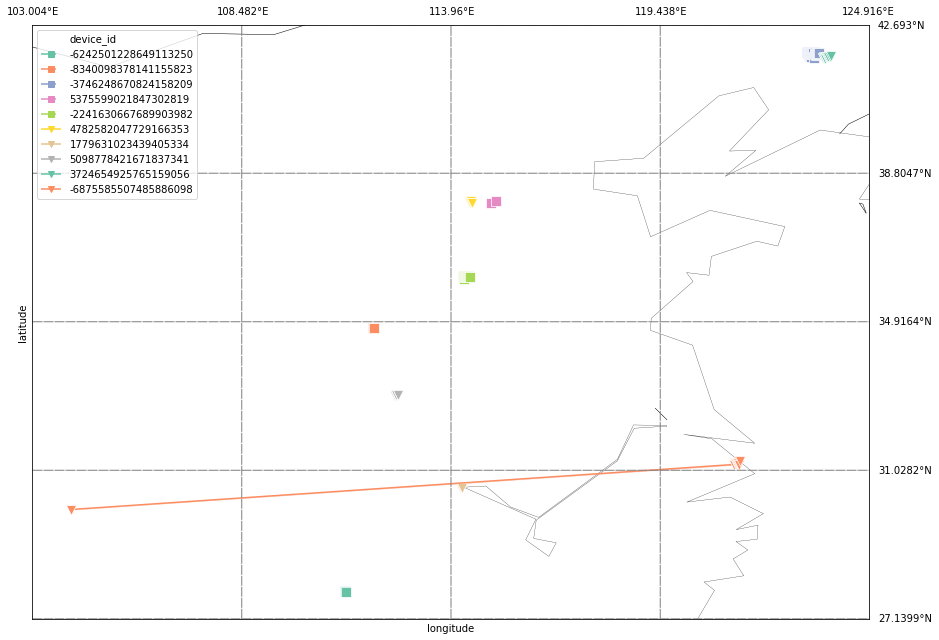

In [42]:
# most events individuals (indicate how often the users use the phone)
user_list = df_merge_phone_events_focus_mainland.device_id.value_counts().index[:10]
# user_list

df_user_single = df_merge_phone_events_focus_mainland[df_merge_phone_events_focus_mainland.device_id.\
                                                     isin(user_list)]
# df_user_single.head()

# last but not least age-cate
fig, ax = plt.subplots(figsize=(15,15))

filled_markers = ['s']*5 + ['v']*5
# linestyles = ['-']*5 + ['--']*5
linestyles = [(10, 5)]*5 + [(1, 0)]*5

sns.lineplot(data=df_user_single,
             x='longitude',
             y='latitude',
             hue='device_id',
             hue_order=user_list,
             palette='Set2',
             #                 edgecolor ='none',                    
             style='device_id',
             style_order=user_list,
             dashes=linestyles,           
             
             
             markers=filled_markers,
             markersize=10,
             ax=ax)

# Initialize the map
# map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')

plt.show()

### comment
I am not able to precisely locate of the users, i.e. which province the users are from, rural or cities. But there is some interesting worth further exploring.

get to know more about the top 3 active users: -6242501228649113250, -8340098378141155823, -3746248670824158209, i.e. their activity behavior
users -3746248670824158209 and 3724654925765159056 are very close to each other, study their behavior.

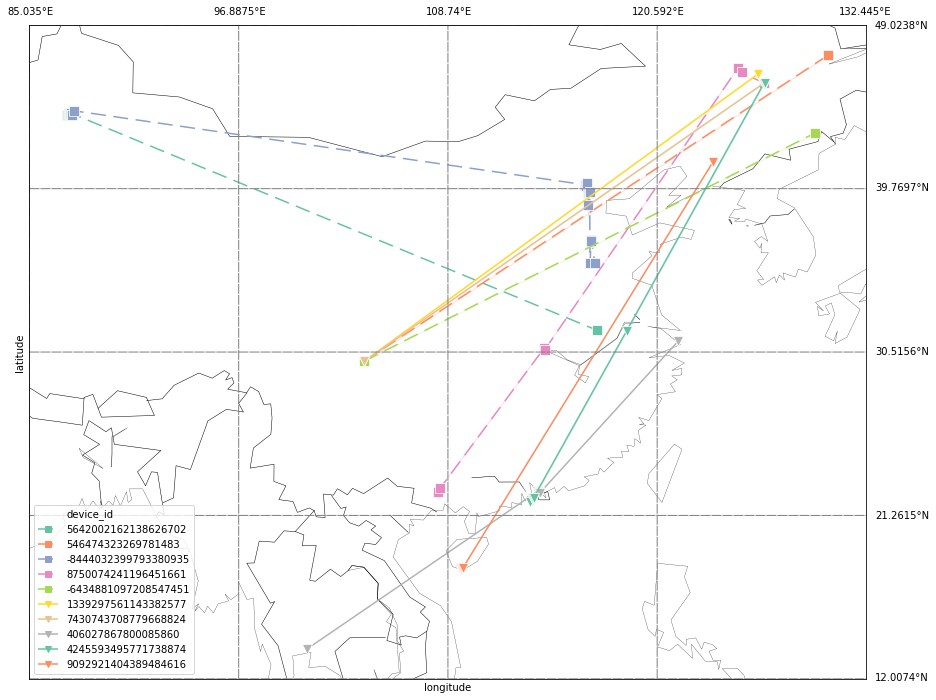

In [43]:
# next let's find out users travel long distance

# top 10 active (based on travel distance long*lat) users and their locations
# to make it more stable, at least 10 activities
# TIPS:

# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_original.copy()
# df_merge_phone_events_focus_mainland = df_merge_phone_events_focus_mainland_sampled.copy()

user_list_tmp = df_merge_phone_events_focus_mainland.device_id.value_counts()\
    [df_merge_phone_events_focus_mainland.device_id.value_counts().apply(lambda x: x>10)].index
user_list = (
            df_merge_phone_events_focus_mainland[df_merge_phone_events_focus_mainland.device_id.isin(user_list_tmp)]\
                 .groupby('device_id').longitude.agg(lambda x: np.square(x.max()-x.min())) +\
            df_merge_phone_events_focus_mainland[df_merge_phone_events_focus_mainland.device_id.isin(user_list_tmp)]\
                 .groupby('device_id').latitude.agg(lambda x: np.square(x.max()-x.min()))\
            ).sort_values(ascending=False).index[:10]
# user_list

df_user_single = df_merge_phone_events_focus_mainland[df_merge_phone_events_focus_mainland.device_id.\
                                                     isin(user_list)]
# df_user_single.head()

# last but not least age-cate
fig, ax = plt.subplots(figsize=(15,15))

# filled_markers = ['o', 'v', 's', ]*4
filled_markers = ['s']*5 + ['v']*5
# linestyles = ['-']*5 + ['--']*5
linestyles = [(10, 5)]*5 + [(1, 0)]*5
sns.lineplot(data=df_user_single,
             x='longitude',
             y='latitude',
             hue='device_id',
             hue_order=user_list,
             palette='Set2',
             #                 edgecolor ='none',                    
             style='device_id',
             style_order=user_list,
             dashes=linestyles,           
             
             
             markers=filled_markers,
             markersize=10,
            
#                 x_jitter=10, y_jitter=10,
#                 alpha=0.005,
#                 color='r',
#                 label=np.arange(1,len(user_list)+1),
                ax=ax)

# Initialize the map
# map = Basemap(llcrnrlon=70, urcrnrlon=150,llcrnrlat=10, urcrnrlat=60, )
map = Basemap(llcrnrlon=ax.get_xlim()[0], urcrnrlon=ax.get_xlim()[1],
              llcrnrlat=ax.get_ylim()[0], urcrnrlat=ax.get_ylim()[1], )
# Continent and countries!
# map.drawmapboundary(fill_color='#A6CAE0', ax=ax)
# map.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF', ax=ax)
map.drawcountries(color="black", linewidth=0.5, ax=ax)
map.drawcoastlines(color="black", linewidth=0.25, zorder=0, ax=ax)

meridians = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],5)
map.drawmeridians(meridians,
                  labels=[0,0,1,0], dashes=[10,1], color='gray'
                 )
parallels = np.linspace(ax.get_ylim()[0],ax.get_ylim()[1],5)
map.drawparallels(parallels,
                  labels=[0,1,1,0], 
                  dashes=[10,1], color='gray'
                 )

ax.set_aspect(aspect='equal')

plt.show()

### Some comment
this plot is very interesting, we can track the user itinary based on that. Also we can postulate whether the users were taking flight or train. This shed a ligth to why there exist so many (0,0) coordinates. Probabely because the users were loosing signals when they were flying.

As mentioned before, GPS data are normally not easy to use, but this distance feature instead is easy to included in the ML models. But first let's analyze this feature across the target columns (i.e. gender, brands, age-cate)

# psudo-distance

In [44]:
df_travel = (df_merge_phone_events_focus_mainland.groupby('device_id').longitude.agg(lambda x: np.square(x.max()-x.min())) +\
    df_merge_phone_events_focus_mainland.groupby('device_id').latitude.agg(lambda x: np.square(x.max()-x.min()))\
            ).sort_values(ascending=False).reset_index()
df_travel.device_id = df_travel.device_id.astype('int64')
df_travel.rename(columns={0: "pseudo_distance"}, inplace=True)
df_travel

df_merge_device_event_adddistance = pd.merge(left=df_merge_phone_focus_cuttail_newgrp,
                                         right=df_travel,
                                         how='inner',
                                         on='device_id')
df_merge_device_event_adddistance.head()

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate,pseudo_distance
0,-3178958522047733033,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.1796
1,-661674373703931011,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.1129
2,-4159560526723406355,vivo,X5Pro,M,29,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.0000
3,-8898050314299440536,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.0000
4,-6820699675296211710,vivo,X5Pro,M,29,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.0052


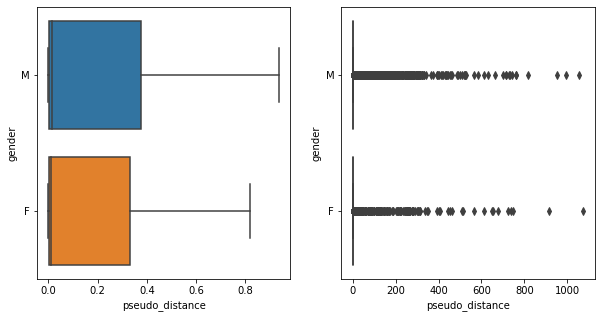

In [45]:
# gender
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='gender',
            showfliers=False,
        
             ax=ax[0]
             )

sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='gender',
            showfliers=True,
        
             ax=ax[1]
             )

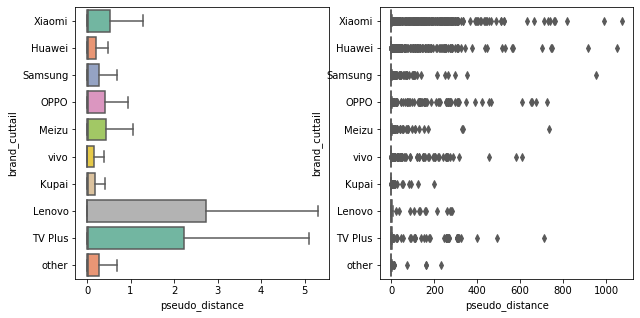

In [46]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='brand_cuttail',
            showfliers=False,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='brand_cuttail',
            showfliers=True,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[1]
             )

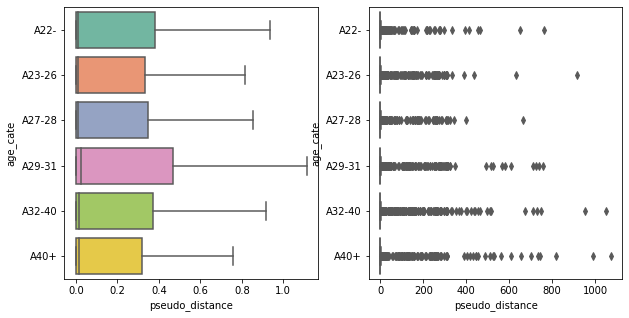

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='age_cate',
            showfliers=False,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_adddistance[df_merge_device_event_adddistance.pseudo_distance>0],
            x='pseudo_distance',
            y='age_cate',
            showfliers=True,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[1]
             )

### It looks like the distribution is too distorted. One last thing before we move on. power transform the psudo-distance. (or use QuantileTransformer)

In [48]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
# pwtransformer = PowerTransformer()

# df_merge_device_event_adddistance['psd_dist_trans'] = pwtransformer.fit_transform(df_merge_device_event_adddistance.pseudo_distance.values.reshape(-1, 1))
df_merge_device_event_adddistance['psd_dist_trans'] = QuantileTransformer().fit_transform(df_merge_device_event_adddistance.pseudo_distance.values.reshape(-1, 1))

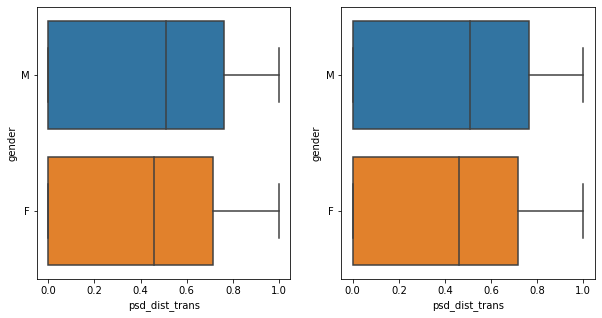

In [49]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='gender',
            showfliers=False,
        
             ax=ax[0]
             )

sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='gender',
            showfliers=True,
        
             ax=ax[1]
             )

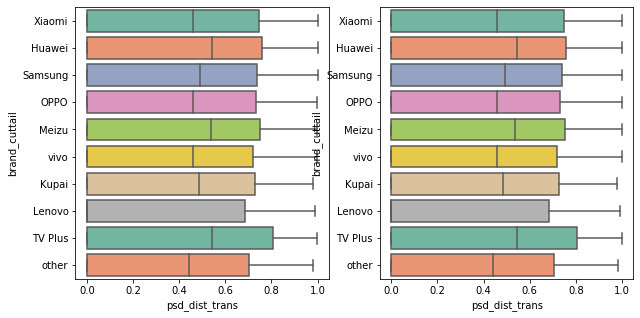

In [50]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='brand_cuttail',
            showfliers=False,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='brand_cuttail',
            showfliers=True,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[1]
             )

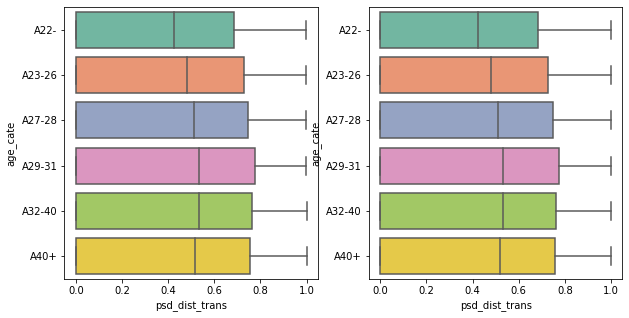

In [51]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='age_cate',
            showfliers=False,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_adddistance,
            x='psd_dist_trans',
            y='age_cate',
            showfliers=True,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[1]
             )

In [52]:
df_merge_device_event_adddistance

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate,pseudo_distance,psd_dist_trans
0,-3178958522047733033,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.1796,0.824898
1,-661674373703931011,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.1129,0.804757
2,-4159560526723406355,vivo,X5Pro,M,29,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.0000,0.000000
3,-8898050314299440536,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.0000,0.000000
4,-6820699675296211710,vivo,X5Pro,M,29,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,0.0052,0.647147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,5251253371369855882,Huawei,MediaPad M2-801W,F,64,F43+,other_model,Huawei,Huawei,Huawei,A40+,0.0000,0.000000
11604,1083742958213289053,vivo,Y22IL,F,43,F43+,other_model,vivo,vivo,other,A40+,0.0000,0.000000
11605,1577683113042373979,HTC,Desire 610t,F,57,F43+,other_model,HTC,other,other,A40+,0.0001,0.440941
11606,6977006754431163888,Meizu,M031,F,50,F43+,other_model,Meizu,Meizu,Meizu,A40+,0.0000,0.000000


## analysis event counts across target labels
- as mentioned earlier, individual users can assocate to several events. (we even plot the GPS info for the top 10 active users.)
- Let's have a deeper analysis on the event count

In [53]:
df_event_count = df_merge_phone_events_focus_mainland.device_id.value_counts().reset_index()
df_event_count.rename(columns={'index': "device_id", 'device_id': "event_count"}, inplace=True)
df_event_count

,device_id,event_count
0,-6242501228649113250,4110
1,-8340098378141155823,3946
2,-3746248670824158209,3760
3,5375599021847302819,3128
4,-2241630667689903982,3030
...,...,...
11553,4497175845951589758,1
11554,-1524620065043482090,1
11555,5843623613840693191,1
11556,-1499197145817039032,1


In [54]:
df_merge_device_event_addcount = pd.merge(left=df_merge_phone_focus_cuttail_newgrp,
                                         right=df_event_count,
                                         how='inner',
                                         on='device_id')
df_merge_device_event_addcount.head()

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate,event_count
0,-3178958522047733033,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,140
1,-661674373703931011,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,66
2,-4159560526723406355,vivo,X5Pro,M,29,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,7
3,-8898050314299440536,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,8
4,-6820699675296211710,vivo,X5Pro,M,29,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31,96


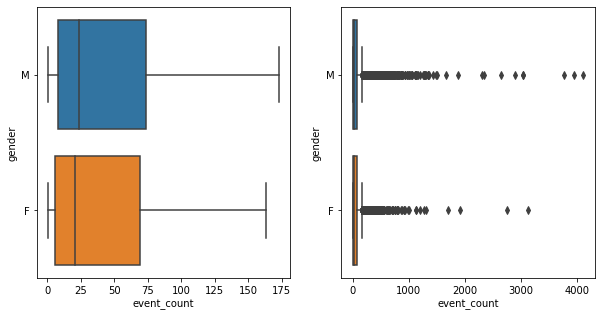

In [55]:
# gender
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='gender',
            showfliers=False,
        
             ax=ax[0]
             )

sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='gender',
            showfliers=True,
        
             ax=ax[1]
             )

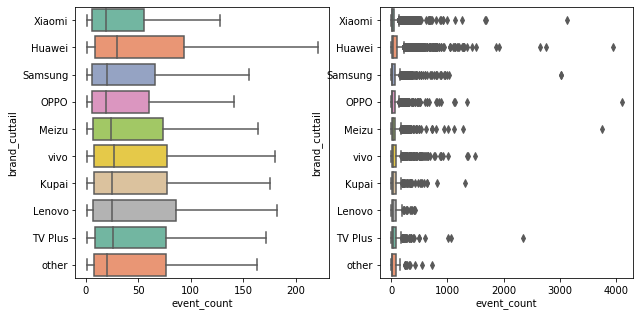

In [56]:
# different phone brand
# note the order is based on user population, i.e. Xiaomi has the most users, then Huawei, etc.
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='brand_cuttail',
            showfliers=False,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='brand_cuttail',
            showfliers=True,            
#             order=np.append(order_tmp[:len(df_merge_device_event_addcount.brand_cuttail_10.unique())].values, []),
            order = order_tmp[:10],
                palette='Set2',        
             ax=ax[1]
             )

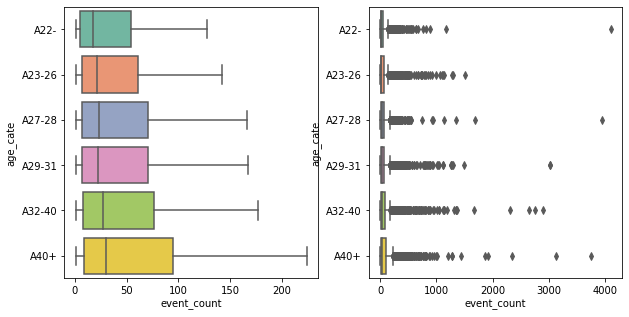

In [57]:
# age-cate
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='age_cate',
            showfliers=False,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[0]
             )
sns.boxplot(data=df_merge_device_event_addcount,
            x='event_count',
            y='age_cate',
            showfliers=True,
            
            order=df_age_cate_link.age_cate.unique(),
                palette='Set2',
                     ax=ax[1]
             )

### some comment
#### I have to point out that the event count comment here is not the same as the record count in the former analysis, and is more useful.
Here the event count has its distribution and can be considered as a feauture (i.e. each deviced_id has an associated event_count), while the record count is just a number, i.e. discriptive statistics.

#### as mentioned earlier, if we consider event count as indicator how frequent users on their phones, then 
- the distributions across all three topics (i.e. gender, brand, age-categories) are heavy-tailed.
- male and female users have similar phone-using behavior
- Huawei and Lenovo users tend to use phone more often
- users in higher age group tend to use phone more often.

#### a reminder, if we want to include this feature for later ML model, it might be desired to tranform the data (i.e. quantile-transform, power-transform) to make the distribution more normal-like.

### last but not least, we can extract geo data feature using descriptive stats
note 'std' might include null value

In [58]:
df_merge_phone_events_focus.groupby('device_id').longitude.agg(['mean', 'std', 'median']).reset_index()

,device_id,mean,std,median
0,-9222956879900151005,90.592000,45.648503,113.24
1,-9221026417907250887,102.692721,34.736061,114.36
2,-9220830859283101130,0.000000,0.000000,0.00
3,-9220061629197656378,93.666346,54.605899,124.88
4,-9218960997324667698,0.000000,0.000000,0.00
...,...,...,...,...
23304,9216925254504446539,80.742385,56.962989,120.56
23305,9217638755105369544,0.000000,NaN,0.00
23306,9219164468944552013,62.701705,60.064122,120.16
23307,9219842210460037807,13.567000,35.180516,0.00


In [59]:
# df_merge_phone_events_focus_mainland.groupby('device_id').longitude.agg(['mean', 'std', 'median']).isna().any()

In [60]:
df_merge_device_gps = df_merge_phone_events_focus.groupby('device_id').longitude.agg('count').reset_index()[['device_id']]

df_merge_device_gps['lat_mean'] = df_merge_phone_events_focus.groupby('device_id').latitude.agg(['mean', 'std', 'median'])['mean'].values
df_merge_device_gps['lat_std'] = df_merge_phone_events_focus.groupby('device_id').latitude.agg(['mean', 'std', 'median'])['std'].values
df_merge_device_gps['lat_median'] = df_merge_phone_events_focus.groupby('device_id').latitude.agg(['mean', 'std', 'median'])['median'].values

df_merge_device_gps['long_mean'] = df_merge_phone_events_focus.groupby('device_id').longitude.agg(['mean', 'std', 'median'])['mean'].values
df_merge_device_gps['long_std'] = df_merge_phone_events_focus.groupby('device_id').longitude.agg(['mean', 'std', 'median'])['std'].values
df_merge_device_gps['long_median'] = df_merge_phone_events_focus.groupby('device_id').longitude.agg(['mean', 'std', 'median'])['median'].values

df_merge_device_gps['event_count'] = df_merge_phone_events_focus.groupby('device_id').longitude.agg(['count'])['count'].values
df_merge_device_gps.fillna(0, inplace=True)

In [61]:
df_merge_device_gps

,device_id,lat_mean,lat_std,lat_median,long_mean,long_std,long_median,event_count
0,-9222956879900151005,18.552000,9.348188,23.19,90.592000,45.648503,113.24,65
1,-9221026417907250887,27.721361,9.376818,30.87,102.692721,34.736061,114.36,147
2,-9220830859283101130,0.000000,0.000000,0.00,0.000000,0.000000,0.00,8
3,-9220061629197656378,34.964231,20.383561,46.60,93.666346,54.605899,124.88,52
4,-9218960997324667698,0.000000,0.000000,0.00,0.000000,0.000000,0.00,6
...,...,...,...,...,...,...,...,...
23304,9216925254504446539,20.974679,14.797439,31.32,80.742385,56.962989,120.56,109
23305,9217638755105369544,0.000000,0.000000,0.00,0.000000,0.000000,0.00,1
23306,9219164468944552013,15.788859,15.124695,30.24,62.701705,60.064122,120.16,780
23307,9219842210460037807,3.540667,9.181310,0.00,13.567000,35.180516,0.00,30


# Timestamp

- just like geo info, when we analysis timestamp the primary key is 'event_id'.
- However, since eventually we will predict targets with assocaited with the 'device_id', we might want to convert the primary key from 'event_id' to 'device_id'. But the question is how.
- maybe we can use descriptive statistics to extract the info. i.e. use average, median, std to describe timestamp (hour) distribution.

In [62]:
# df_merge_phone_events_focus_mainland_sample = df_merge_phone_events_focus_mainland.sample(n=50000, random_state=RANDOM_STATE)
# get back to use the whole thing
df_merge_phone_events_focus_mainland_sample = df_merge_phone_events_focus.copy()

In [63]:
# pasrse the timestamp to hour
df_merge_phone_events_focus_mainland_sample['hour'] = pd.to_datetime(df_merge_phone_events_focus_mainland_sample.timestamp).dt.hour
df_merge_phone_events_focus_mainland_sample.head()

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate,event_id,timestamp,longitude,latitude,hour
0,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,69136,2016-05-02 06:24:55,0.0,0.0,6
1,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,174606,2016-05-01 00:31:24,0.0,0.0,0
2,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,243296,2016-05-02 06:21:29,0.0,0.0,6
3,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,784955,2016-05-05 06:37:57,0.0,0.0,6
4,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,1001397,2016-05-01 00:34:21,0.0,0.0,0


(array([45058., 27214., 20350., 17068., 16301., 24602., 44068., 55705.,
        59229., 62432., 68793., 63137., 62756., 58475., 56571., 55513.,
        57222., 58455., 57982., 62348., 65394., 67760., 62247., 51794.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

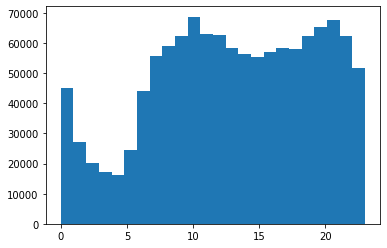

In [64]:
# plot hour hist
plt.hist(df_merge_phone_events_focus_mainland_sample.hour, bins=24)

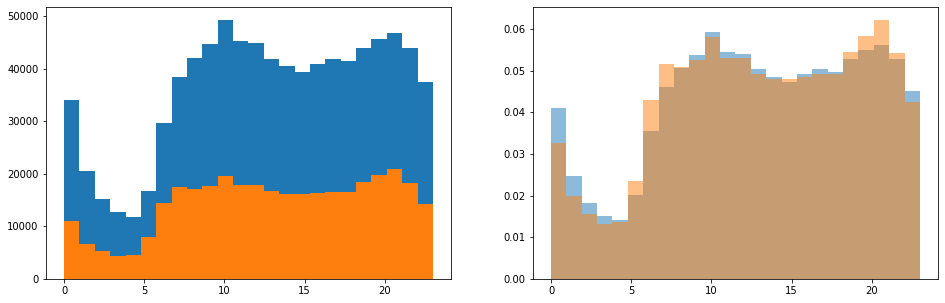

In [65]:
fig, axes = plt.subplots(1,2, figsize=(16, 5))
ax = axes[0]
for value in df_merge_phone_events_focus_mainland_sample.gender.unique():
    condition_tmp = (df_merge_phone_events_focus_mainland_sample.gender==value)
    ax.hist(df_merge_phone_events_focus_mainland_sample[condition_tmp].hour, bins=24)
ax = axes[1]    
for value in df_merge_phone_events_focus_mainland_sample.gender.unique():
    condition_tmp = (df_merge_phone_events_focus_mainland_sample.gender==value)
    ax.hist(df_merge_phone_events_focus_mainland_sample[condition_tmp].hour, bins=24, density=True, alpha=0.5, label=value)

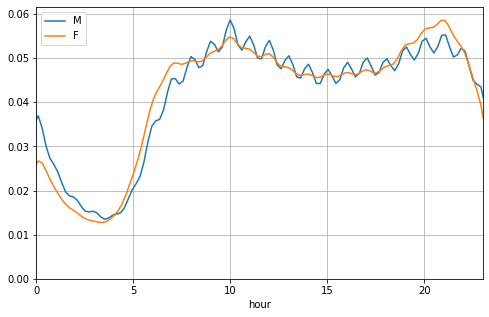

In [66]:
# normalized event-hour-log across gender (normalized)
fig, ax = plt.subplots(figsize=(8,5))
for value in df_merge_phone_events_focus_mainland_sample.gender.unique():
    condition_tmp = (df_merge_phone_events_focus_mainland_sample.gender==value)
    sns.distplot(df_merge_phone_events_focus_mainland_sample[condition_tmp].hour, bins=24, 
                 kde=True,
                 hist=False,
                 norm_hist=True, 
#                  alpha=0.5, 
                 label=value,
                 ax=ax,             
                )
ax.set_xlim((0,23))
plt.grid()
plt.show()

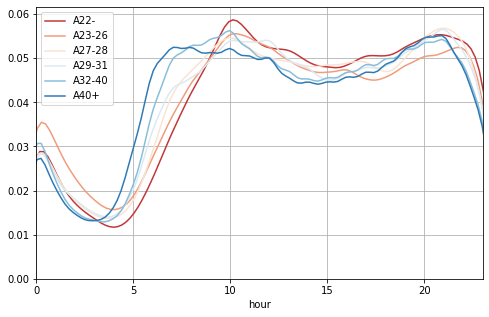

In [67]:
# normalized event-hour-log across age-cate (normalized)
fig, ax = plt.subplots(figsize=(8,5))
# for value in df_merge_phone_events_focus_mainland_original.age_cate.unique():
for i,value in    enumerate(['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+']):
    condition_tmp = (df_merge_phone_events_focus_mainland_sample.age_cate==value)
    sns.distplot(df_merge_phone_events_focus_mainland_sample[condition_tmp].hour, bins=24, 
                 kde=True,
                 hist=False,
                 norm_hist=True, 
#                  alpha=0.5, 
                 label=value,
                 ax=ax,             
                 color = sns.color_palette('RdBu', 6)[i]
                )
ax.set_xlim((0,23))
plt.grid()
plt.show()

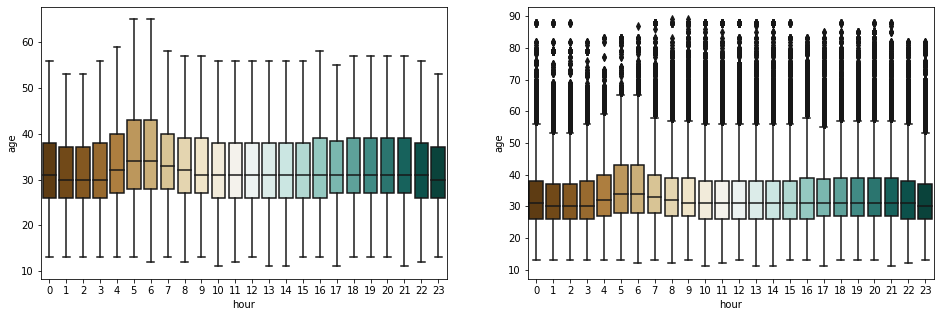

In [68]:
# # normalized event-hour-log across age using boxplot, w/ and w/o fliers
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.boxplot(data=df_merge_phone_events_focus_mainland_sample, y='age', x='hour', 
            showfliers=False,
            palette='BrBG',
            ax=ax[0]
           )
sns.boxplot(data=df_merge_phone_events_focus_mainland_sample, y='age', x='hour', 
            showfliers=True,
            palette='BrBG',
            ax=ax[1]
           )
plt.show()

### Some comment
- there is no significant difference among different age classes or age classes concerning timestamp. In other words, we cannot tell which target group an event belongs to just based on when such event happened.
- But there is some weak trend in the distribution. e.g. female users have more events record at 5-7am, and 8pm. As age increase, there are more events during 5-7am. This should make sense cause female users and users in older group tend to wake up earlier. (an extra support evidence is users from female group and older group have less event recorded at midnight, which indicates they go to bed already and thus be able to wake up early.)

In [69]:
# let's extract the descriptive stats
# note that hour is perodic data, descriptive stats might not be the best way for representation
df_merge_phone_events_focus_mainland_sample.groupby('device_id').hour.agg(['mean', 'std', 'median'] )

,mean,std,median
device_id,,,
-9222956879900151005,14.784615,3.705959,15.0
-9221026417907250887,13.149660,6.012947,12.0
-9220830859283101130,16.375000,8.959233,20.0
-9220061629197656378,13.038462,3.715160,13.0
-9218960997324667698,16.500000,6.892024,18.5
...,...,...,...
9216925254504446539,15.926606,5.060205,17.0
9217638755105369544,4.000000,NaN,4.0
9219164468944552013,13.769231,5.708411,14.0


In [70]:
# since there are so many categories, maybe we can encode the frequency associated with each hour
# next iteration we can try to decrease the bin number, i.e.from 24 to 12 or 6

from sklearn.preprocessing import OneHotEncoder
ohencoder = OneHotEncoder(sparse=False,
    dtype='int8')

hour_encode = ohencoder.fit_transform(df_merge_phone_events_focus_mainland_sample.hour.values.reshape(-1, 1))
hour_encode.shape

df_hour_encode = pd.DataFrame(hour_encode)
df_hour_encode.columns = ['hour_'+ str(i) for i in range(len(df_hour_encode.columns))]
df_hour_encode.index = df_merge_phone_events_focus_mainland_sample.index
df_hour_encode 

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220469,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1220471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1220472,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df_merge_phone_events_focus_mainland_sample

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate,event_id,timestamp,longitude,latitude,hour
0,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,69136,2016-05-02 06:24:55,0.0,0.0,6
1,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,174606,2016-05-01 00:31:24,0.0,0.0,0
2,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,243296,2016-05-02 06:21:29,0.0,0.0,6
3,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,784955,2016-05-05 06:37:57,0.0,0.0,6
4,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,1001397,2016-05-01 00:34:21,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220469,4792275261540898826,waveguide,Doeasy E700,F,44,F43+,other_model,other,other,other,A40+,72846,2016-05-02 06:36:23,0.0,0.0,6
1220470,4792275261540898826,waveguide,Doeasy E700,F,44,F43+,other_model,other,other,other,A40+,1623004,2016-05-07 21:07:58,0.0,0.0,21
1220471,4792275261540898826,waveguide,Doeasy E700,F,44,F43+,other_model,other,other,other,A40+,2246491,2016-05-05 19:42:25,0.0,0.0,19
1220472,4792275261540898826,waveguide,Doeasy E700,F,44,F43+,other_model,other,other,other,A40+,2307097,2016-05-02 07:42:41,0.0,0.0,7


In [72]:
df_merge_phone_events_focus_mainland_sample_encode = pd.concat([df_merge_phone_events_focus_mainland_sample,
           df_hour_encode], axis=1, ignore_index=False)

In [73]:
df_merge_phone_events_focus_mainland_sample_encode.groupby('device_id').agg('sum')

,age,event_id,longitude,latitude,hour,hour_0,hour_1,hour_2,hour_3,hour_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,2340,90491289,5888.48,1205.88,961,0.0,0.0,0.0,0.0,0.0,...,5.0,22.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,3.0
-9221026417907250887,4557,259780541,15095.83,4075.04,1933,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,13.0,2.0,4.0,3.0,26.0,0.0,13.0,3.0
-9220830859283101130,152,12526693,0.00,0.00,131,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0
-9220061629197656378,2080,80791266,4870.65,1818.14,678,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,0.0,0.0
-9218960997324667698,318,6354826,0.00,0.00,99,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216925254504446539,4469,178588965,8800.92,2286.24,1736,0.0,0.0,0.0,0.0,3.0,...,1.0,9.0,1.0,3.0,12.0,10.0,9.0,4.0,16.0,3.0
9217638755105369544,49,1957215,0.00,0.00,4,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9219164468944552013,27300,1266886220,48907.33,12315.31,10740,1.0,4.0,8.0,7.0,6.0,...,30.0,38.0,29.0,36.0,46.0,53.0,49.0,39.0,47.0,29.0


In [74]:
df_encode_hour_freq = (df_merge_phone_events_focus_mainland_sample_encode.groupby('device_id')[df_hour_encode.columns].agg('sum')/\
    df_merge_phone_events_focus_mainland_sample_encode.groupby('device_id')[df_hour_encode.columns].agg('count')).reset_index()
df_encode_hour_freq

,device_id,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-9222956879900151005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030769,0.000000,...,0.076923,0.338462,0.000000,0.000000,0.000000,0.000000,0.061538,0.092308,0.000000,0.046154
1,-9221026417907250887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.292517,0.068027,...,0.000000,0.027211,0.088435,0.013605,0.027211,0.020408,0.176871,0.000000,0.088435,0.020408
2,-9220830859283101130,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.125000,0.000000,0.250000
3,-9220061629197656378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.019231,0.038462,...,0.096154,0.000000,0.019231,0.019231,0.076923,0.038462,0.019231,0.038462,0.000000,0.000000
4,-9218960997324667698,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,9216925254504446539,0.000000,0.000000,0.000000,0.000000,0.027523,0.018349,0.018349,0.009174,0.036697,...,0.009174,0.082569,0.009174,0.027523,0.110092,0.091743,0.082569,0.036697,0.146789,0.027523
23305,9217638755105369544,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23306,9219164468944552013,0.001282,0.005128,0.010256,0.008974,0.007692,0.011538,0.061538,0.071795,0.046154,...,0.038462,0.048718,0.037179,0.046154,0.058974,0.067949,0.062821,0.050000,0.060256,0.037179
23307,9219842210460037807,0.100000,0.033333,0.066667,0.066667,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.100000,0.066667,0.066667,0.100000,0.066667


# some comments
we will rearrange the dataframe later, after we finish the analysis on app_event.
## have done
- keep in mind, the primary key is 'device_id', so, the number of row is 23,309. (we only focus on users have event records), 
- curtail the brand number to 20+1, model number to 100+1+1+1, create brand_model col
- create event_count col
- extract geo data feature, psudo-distance, lat_mean, lat_std (fillna with 0), lat_median, long_mean, long_std, long_median (we can include GPS=0 data, since they still have prediction capabilities)
- extract timestamp feautre, creat hour_0, hour_1,... hour_23 cols
## to do
- merge/rearrange the extract feature with df_merge_phone_events_focus

# app event
be very careful when trying to merge this, because it is huge

In [75]:
df_app_events_original = pd.read_csv('./talkingdata-mobile-user-demographics/app_events.csv')
df_app_events_original.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [76]:
df_app_events = df_app_events_original.drop('is_installed', axis=1)
df_app_events.head()

,event_id,app_id,is_active
0,2,5927333115845830913,1
1,2,-5720078949152207372,0
2,2,-1633887856876571208,0
3,2,-653184325010919369,1
4,2,8693964245073640147,1


In [77]:
df_app_labels = pd.read_csv('./talkingdata-mobile-user-demographics/app_labels.csv')
df_app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [78]:
df_label_categories = pd.read_csv('./talkingdata-mobile-user-demographics/label_categories.csv')
df_label_categories.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [79]:
df_merge_app_id_label = pd.merge(left=df_app_labels,
                        right=df_label_categories,
                        how='inner',
                        on='label_id')
df_merge_app_id_label.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance


In [80]:
df_merge_phone_events_focus

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate,event_id,timestamp,longitude,latitude
0,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,69136,2016-05-02 06:24:55,0.0,0.0
1,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,174606,2016-05-01 00:31:24,0.0,0.0
2,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,243296,2016-05-02 06:21:29,0.0,0.0
3,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,784955,2016-05-05 06:37:57,0.0,0.0
4,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31,1001397,2016-05-01 00:34:21,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220469,4792275261540898826,waveguide,Doeasy E700,F,44,F43+,other_model,other,other,other,A40+,72846,2016-05-02 06:36:23,0.0,0.0
1220470,4792275261540898826,waveguide,Doeasy E700,F,44,F43+,other_model,other,other,other,A40+,1623004,2016-05-07 21:07:58,0.0,0.0
1220471,4792275261540898826,waveguide,Doeasy E700,F,44,F43+,other_model,other,other,other,A40+,2246491,2016-05-05 19:42:25,0.0,0.0
1220472,4792275261540898826,waveguide,Doeasy E700,F,44,F43+,other_model,other,other,other,A40+,2307097,2016-05-02 07:42:41,0.0,0.0


In [81]:
# this might not seem very useful, but the point is to narrow down to focus users
df_merge_device_event_app = pd.merge(left=df_app_events,
                 right=df_merge_phone_events_focus[['event_id', 'device_id']],
                 how='inner',
                 on='event_id')
df_merge_device_event_app.head()

,event_id,app_id,is_active,device_id
0,6,-7377004479023402858,1,1476664663289716375
1,6,6284164581582112235,1,1476664663289716375
2,6,5927333115845830913,1,1476664663289716375
3,6,3433289601737013244,1,1476664663289716375
4,6,-3467200097934864127,1,1476664663289716375


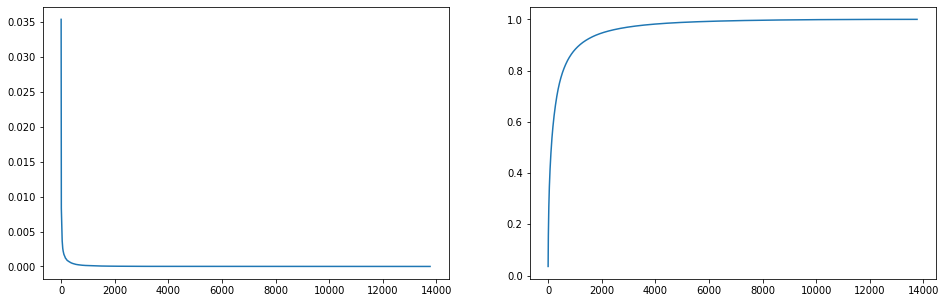

In [82]:
# though there are over 14,000 apps, it looks like the top 2,000 apps contribute most of the events
fig, ax = plt.subplots(1,2, figsize=(16,5))
sum_tmp = df_merge_device_event_app.app_id.value_counts().values.sum()
ax[0].plot(range(len(df_merge_device_event_app.app_id.value_counts().values)), df_merge_device_event_app.app_id.value_counts().values/sum_tmp)

ax[1].plot(range(len(df_merge_device_event_app.app_id.value_counts().values)), (df_merge_device_event_app.app_id.value_counts().values/sum_tmp).cumsum())

(0, 500)

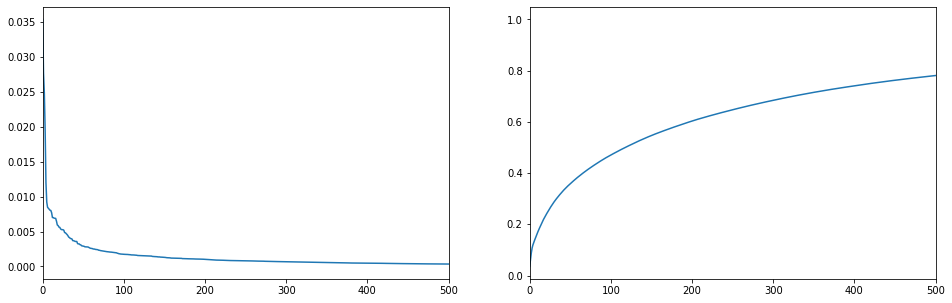

In [83]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
sum_tmp = df_merge_device_event_app.app_id.value_counts().values.sum()
ax[0].plot(range(len(df_merge_device_event_app.app_id.value_counts().values)), df_merge_device_event_app.app_id.value_counts().values/sum_tmp)

ax[1].plot(range(len(df_merge_device_event_app.app_id.value_counts().values)), (df_merge_device_event_app.app_id.value_counts().values/sum_tmp).cumsum())
ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)

In [84]:
# for now, let's take the first 2000, first.
app_id_list = df_merge_device_event_app.app_id.value_counts().index
app_id_top_2000 = app_id_list[:2000]
app_id_top_200 = app_id_list[:200]

In [85]:
app_id_top_2000

Int64Index([ 8693964245073640147,  5927333115845830913,  4348659952760821294,
              628020936226491308,  3433289601737013244, -2320783822570582843,
             6284164581582112235,  5729517255058371973,  8948670408023620661,
             3683147815759994238,
            ...
             8969595527211323939,   340144690045823988,  3647771214116620927,
             2640296003678358603,  2869658829241173592, -6150881749490336284,
             6868304015740040130, -1730189255386228103,  6324195110882322837,
             5635378286848765996],
           dtype='int64', length=2000)

In [86]:
# now let's take a look at the app_label/category
# this is kinda troublesome, it is a long dataframe instead of a wide one, it might not be very intuitive to display info
df_merge_app_id_label

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance
...,...,...,...
459938,-5364349117796323466,985,Word games
459939,6320161160475087425,985,Word games
459940,7641656572760613661,985,Word games
459941,-2037260970074339790,985,Word games


In [87]:
# what about this?
# it looks good, but hard to get insights.
df_merge_app_id_label[df_merge_app_id_label.app_id.isin(app_id_top_2000)].groupby('app_id').apply(lambda x: x.label_id.unique())

app_id
-9216716044975227433                   [548, 714, 704, 179]
-9208020732558900907             [251, 259, 302, 306, 1019]
-9198654150634969665    [548, 706, 707, 704, 302, 306, 209]
-9192640465934207713         [549, 548, 302, 303, 224, 281]
-9192350788455346872                   [548, 713, 704, 149]
                                       ...                 
 9136721329817567486              [549, 548, 713, 721, 704]
 9175005479893042064         [548, 867, 870, 854, 281, 283]
 9180482024088640009              [549, 548, 713, 704, 227]
 9191281777812604868                           [29, 92, 97]
 9220205176760015004                        [549, 548, 152]
Length: 2000, dtype: object

In [88]:
# maybe this way is better
df_merge_app_id_label[df_merge_app_id_label.app_id.isin(app_id_top_2000)].category.value_counts()

Industry tag             1307
Property Industry 2.0     854
unknown                   707
Property Industry 1.0     642
Services 1                407
                         ... 
readers                     1
farm                        1
Engineering Drawing         1
gambling                    1
Exchange                    1
Name: category, Length: 339, dtype: int64

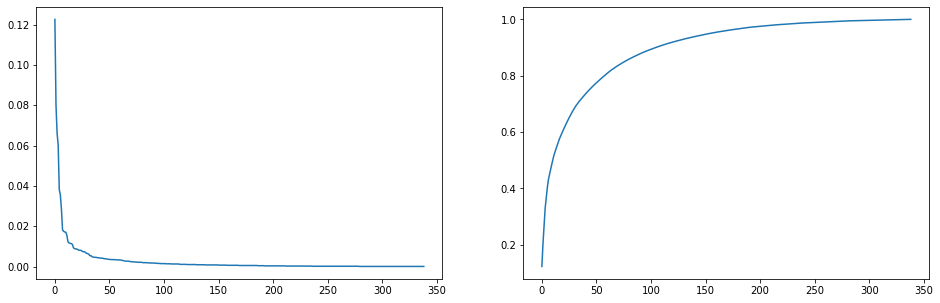

In [89]:
# let's visiualize it 
fig, ax = plt.subplots(1,2, figsize=(16,5))
val_count_tmp = df_merge_app_id_label[df_merge_app_id_label.app_id.isin(app_id_top_2000)].category.value_counts()
sum_tmp = val_count_tmp.values.sum()
ax[0].plot(range(len(val_count_tmp)), val_count_tmp.values/sum_tmp)

ax[1].plot(range(len(val_count_tmp)), (val_count_tmp.values/sum_tmp).cumsum())

In [90]:
df_merge_app_id_label

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance
...,...,...,...
459938,-5364349117796323466,985,Word games
459939,6320161160475087425,985,Word games
459940,7641656572760613661,985,Word games
459941,-2037260970074339790,985,Word games


In [91]:
# for now, let's take the first 50, first.
app_cate_list = df_merge_app_id_label[df_merge_app_id_label.app_id.isin(app_id_top_2000)].category.value_counts().index
app_cate_top_50 = app_cate_list[:50]
app_cate_top_20 = app_cate_list[:20]

app_label_list = df_merge_app_id_label[df_merge_app_id_label.app_id.isin(app_id_top_2000)].label_id.value_counts().index
app_label_top_50 = app_label_list[:50]
app_label_top_20 = app_label_list[:20]


In [92]:
df_merge_app_id_label[df_merge_app_id_label.app_id.isin(app_id_top_2000)].category.unique()

array(['Finance', 'unknown', 'DS_P2P net loan', 'Securities',
       'Lottery ticket', 'IMF', 'Precious Metals', 'pursue',
       'Science and Technology', 'Customization', 'service',
       'Smart Shopping', 'Personal Effectiveness', 'free', 'vitality',
       'Trendy / cool', 'Relatives', 'comfortable', 'Debit and credit',
       'Crowdfunding financing', 'Custom label', 'Ping', 'Peace - Search',
       'mobile bank', 'Direct Bank', 'futures', 'Property Industry 1.0',
       'Industry tag', 'Pay', 'Wealth Management', 'Customized 1',
       '1 free', 'Cozy 1', 'Services 1', 'Pursuit 1', 'Noble 1',
       'Trendy / cool 1', 'Passion 1', 'Personal Effectiveness 1',
       'Total Cost 1', 'Smart Shopping 1', 'Science and Technology 1',
       'Relatives 1', '1 vitality', 'Irritation / Fun 1', 'Quality 1',
       '1 reputation', 'Nature 1', 'Simple 1', 'Property Industry 2.0',
       'Occupational identity', 'College Students',
       'Condition of the vehicles', 'Bank financing', 'Inter

(-0.5, 999.5, 719.5, -0.5)

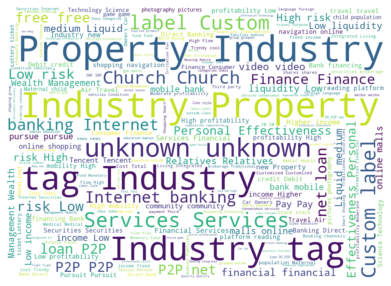

In [93]:
# viuslize using wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


fig, ax = plt.subplots(1,1, figsize=(8,5))

wc = WordCloud(background_color='white', random_state=RANDOM_STATE+1,
              width=200*5, height=240*3,)

# text = df_tmp.label_id_list.str.cat(sep=' ')
text = [(cate_name+" ") * val for cate_name,val in zip(val_count_tmp.index,val_count_tmp)]
text
wc.generate(str(text))

default_color = 'grey'

ax.imshow(wc, interpolation='bilinear', )
ax.axis("off")

(-0.5, 999.5, 719.5, -0.5)

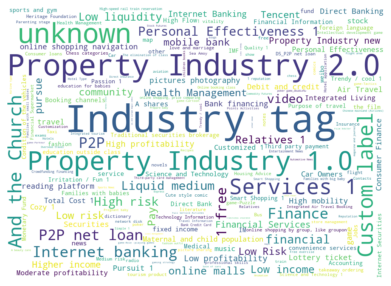

In [94]:
# use frequency
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

freq_dict = val_count_tmp.to_dict()
freq_dict

fig, ax = plt.subplots(1,1, figsize=(8,5))

wc = WordCloud(background_color='white', random_state=RANDOM_STATE+1,
              width=200*5, height=240*3,)


wc.generate_from_frequencies(frequencies=freq_dict)

default_color = 'grey'

ax.imshow(wc, interpolation='bilinear', )
ax.axis("off")

# some comments
- It looks like the top 20 categories contributes 80% of all the categories. So, consider to trim the categories down to 21. (i.e. top 20 + other)
- also we might want to take a look how many apps are associated with such top 20 categories
- plus, it is worth to explore whether such apps are active or inactive. (I am not exactely sure what active and inactive really means, but maybe we can find out)
- last but not least, we should check if all the categories we picked are meanful, e.g. do we really need "industry label"?

In [95]:
# apparently, a lot of app is inactive. do we need them?
df_app_events.groupby('is_active').count()

,event_id,app_id
is_active,,
0,19740071,19740071
1,12732996,12732996


In [96]:
# half of the inactive app have ever been active
count_val_tmp = df_app_events[df_app_events.is_active==0].app_id.value_counts()
df_app_events[(df_app_events.is_active==1) &
                        (df_app_events.app_id.isin(count_val_tmp.index))].app_id.value_counts()

 8693964245073640147    918156
 5927333115845830913    617102
 4348659952760821294    427541
 628020936226491308     349882
-3955212733485100109    244681
                         ...  
-890274011445282601          1
 3364803264263770351         1
 9184022816963385838         1
-2742432765101134827         1
 1226188997837193695         1
Name: app_id, Length: 9534, dtype: int64

# Final comments
since only half of the inactive app have ever been active, here is what we gonna do
- focus on those apps ever been active an inactive
- trim down the app to focus
- note that the label and app are still very sparse even though we trim it down. I am not sure how much the later ML model can learn from this sparse data from scratch with relatively not many data provided. i.e. even though certain gender group, like M has  shown a tendency of 'Tencent' labeled app, but such behavior might not be generative enough since we don't have enough data. For this reason, I will 'happily' exclude the app info in the ML model.



# OK I lied
for desmonstration purpose, I will include the top 100 apps with thier associated 27-1 label_catetories (I will exclude the -1 category)

In [97]:
df_merge_app_id_label

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance
...,...,...,...
459938,-5364349117796323466,985,Word games
459939,6320161160475087425,985,Word games
459940,7641656572760613661,985,Word games
459941,-2037260970074339790,985,Word games


In [98]:
df_merge_device_event_app

,event_id,app_id,is_active,device_id
0,6,-7377004479023402858,1,1476664663289716375
1,6,6284164581582112235,1,1476664663289716375
2,6,5927333115845830913,1,1476664663289716375
3,6,3433289601737013244,1,1476664663289716375
4,6,-3467200097934864127,1,1476664663289716375
...,...,...,...,...
12273447,3252948,6607018907660377991,1,7111660304904287709
12273448,3252948,6602285879264922467,1,7111660304904287709
12273449,3252948,4348659952760821294,1,7111660304904287709
12273450,3252948,-995726944612374565,1,7111660304904287709


In [99]:
# only merge the top 50 app labels and top 2000 app_id
# I use right outer join, so that we would not dispose user_id data. (then that could be null value create)
df_merge_tmp = pd.merge(left=df_merge_app_id_label[df_merge_app_id_label.label_id.isin(app_label_top_50)&
                                                  df_merge_app_id_label.app_id.isin(app_id_top_2000)]\
                            [['label_id', 'app_id']],
                        right=df_merge_device_event_app[['device_id', 'app_id']],                        
                        how='right',
                        on='app_id')
df_merge_tmp.head()

,label_id,app_id,device_id
0,251.0,1061207043315821111,176364454226994885
1,263.0,1061207043315821111,176364454226994885
2,405.0,1061207043315821111,176364454226994885
3,548.0,1061207043315821111,176364454226994885
4,756.0,1061207043315821111,176364454226994885


In [100]:
df_merge_tmp.isna().any()
df_merge_tmp.info()

df_merge_tmp.fillna(-1, inplace=True)
df_merge_tmp.label_id = df_merge_tmp.label_id.astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61432771 entries, 0 to 61432770
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   label_id   float64
 1   app_id     int64  
 2   device_id  int64  
dtypes: float64(1), int64(2)
memory usage: 1.8 GB


In [101]:
# let's use a sample to build the pipeline first
# df_merge_tmp_sample = df_merge_tmp.sample(n=50000, random_state=RANDOM_STATE)
df_merge_tmp_sample = df_merge_tmp
df_merge_tmp_sample.head()

,label_id,app_id,device_id
0,251,1061207043315821111,176364454226994885
1,263,1061207043315821111,176364454226994885
2,405,1061207043315821111,176364454226994885
3,548,1061207043315821111,176364454226994885
4,756,1061207043315821111,176364454226994885


In [102]:
# df_merge_tmp_sample.groupby('device_id').apply(lambda x: x.app_id.unique())

In [103]:
# df_merge_tmp_sample.groupby('device_id').apply(lambda x: x.label_id.unique())

In [104]:
df_tmp = df_merge_tmp_sample.groupby('device_id').apply(lambda x: x.label_id.value_counts()).reset_index()
df_tmp.head()

,device_id,level_1,label_id
0,-9222956879900151005,548,1351
1,-9222956879900151005,1007,1177
2,-9222956879900151005,959,1033
3,-9222956879900151005,960,1033
4,-9222956879900151005,405,649


In [105]:
# it is already the top 50 +1
df_tmp.level_1.nunique()

51

In [106]:
ohencoder = OneHotEncoder(sparse=False,
    dtype='int8', )

label_encode = ohencoder.fit_transform(df_tmp.level_1.values.reshape(-1, 1))
label_encode.shape

df_label_encode = pd.DataFrame(label_encode)
df_label_encode.columns =ohencoder.get_feature_names(['label_'])
df_label_encode.index = df_tmp.index
# df_label_encode.head() 

In [107]:
df_merge_device_label_tmp_encode = pd.concat([df_tmp,
           df_label_encode], axis=1, ignore_index=False)

# df_encode_hour_freq = (df_merge_phone_events_focus_mainland_sample_encode.groupby('device_id')[df_hour_encode.columns].agg('sum')/\
#     df_merge_phone_events_focus_mainland_sample_encode.groupby('device_id')[df_hour_encode.columns].agg('count')).reset_index()
# df_encode_hour_freq
df_merge_device_label_tmp_encode_freq = (df_merge_device_label_tmp_encode.groupby('device_id')[df_label_encode.columns].agg('sum')/\
    df_merge_device_label_tmp_encode.groupby('device_id')[df_label_encode.columns].agg('count')).reset_index()

df_merge_device_label_tmp_encode_freq.head()


,device_id,label__-1,label__128,label__130,label__152,label__168,label__179,label__209,label__251,label__252,...,label__795,label__854,label__909,label__932,label__959,label__960,label__1007,label__1012,label__1014,label__1015
0,-9222956879900151005,0.028571,0.000000,0.0,0.028571,0.000000,0.000000,0.028571,0.028571,0.028571,...,0.0,0.028571,0.000000,0.000000,0.028571,0.028571,0.028571,0.000000,0.0,0.000000
1,-9221026417907250887,0.028571,0.028571,0.0,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,...,0.0,0.000000,0.028571,0.028571,0.000000,0.000000,0.028571,0.028571,0.0,0.000000
2,-9220830859283101130,0.090909,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,-9220061629197656378,0.023810,0.023810,0.0,0.023810,0.000000,0.023810,0.000000,0.023810,0.023810,...,0.0,0.000000,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.0,0.000000
4,-9218960997324667698,0.027778,0.027778,0.0,0.000000,0.000000,0.027778,0.027778,0.027778,0.027778,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.027778,0.0,0.027778


# similarly, perform this on app_id, but this time only the top 20

In [108]:
app_id_list[:20]

Int64Index([ 8693964245073640147,  5927333115845830913,  4348659952760821294,
              628020936226491308,  3433289601737013244, -2320783822570582843,
             6284164581582112235,  5729517255058371973,  8948670408023620661,
             3683147815759994238,  7348340405200054701, -3955212733485100109,
             3717049149426646122, -6590029937880196169,  7460082553072507347,
            -5720078949152207372,  4244331088397413857,  -538061441862183033,
             9112463114311278255,    33792862810792679],
           dtype='int64')

In [109]:
df_tmp_app_id = df_merge_tmp_sample[df_merge_tmp_sample.app_id.isin(app_id_list[:20])].groupby('device_id').apply(lambda x: x.app_id.value_counts()).reset_index()
df_tmp_app_id.head()

,device_id,level_1,app_id
0,-9222956879900151005,4348659952760821294,256
1,-9222956879900151005,3683147815759994238,180
2,-9222956879900151005,-5720078949152207372,150
3,-9222956879900151005,5927333115845830913,124
4,-9222956879900151005,8693964245073640147,112


In [110]:
ohencoder = OneHotEncoder(sparse=False,
    dtype='int8', )

app_encode = ohencoder.fit_transform(df_tmp_app_id.level_1.values.reshape(-1, 1))
# app_encode.shape

df_app_encode = pd.DataFrame(app_encode)
df_app_encode.columns =ohencoder.get_feature_names(['app_'])
df_app_encode.index = df_tmp_app_id.index
df_app_encode.head() 

,app__-6590029937880196169,app__-5720078949152207372,app__-3955212733485100109,app__-2320783822570582843,app__-538061441862183033,app__33792862810792679,app__628020936226491308,app__3433289601737013244,app__3683147815759994238,app__3717049149426646122,app__4244331088397413857,app__4348659952760821294,app__5729517255058371973,app__5927333115845830913,app__6284164581582112235,app__7348340405200054701,app__7460082553072507347,app__8693964245073640147,app__8948670408023620661,app__9112463114311278255
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [111]:
df_merge_device_app_tmp_encode = pd.concat([df_tmp_app_id,
           df_app_encode], axis=1, ignore_index=False)

# df_encode_hour_freq = (df_merge_phone_events_focus_mainland_sample_encode.groupby('device_id')[df_hour_encode.columns].agg('sum')/\
#     df_merge_phone_events_focus_mainland_sample_encode.groupby('device_id')[df_hour_encode.columns].agg('count')).reset_index()
# df_encode_hour_freq
df_merge_device_app_tmp_encode_freq = (df_merge_device_app_tmp_encode.groupby('device_id')[df_app_encode.columns].agg('sum')/\
    df_merge_device_app_tmp_encode.groupby('device_id')[df_app_encode.columns].agg('count')).reset_index()

df_merge_device_app_tmp_encode_freq.head()


,device_id,app__-6590029937880196169,app__-5720078949152207372,app__-3955212733485100109,app__-2320783822570582843,app__-538061441862183033,app__33792862810792679,app__628020936226491308,app__3433289601737013244,app__3683147815759994238,...,app__4244331088397413857,app__4348659952760821294,app__5729517255058371973,app__5927333115845830913,app__6284164581582112235,app__7348340405200054701,app__7460082553072507347,app__8693964245073640147,app__8948670408023620661,app__9112463114311278255
0,-9222956879900151005,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.166667,0.000000,0.166667,0.0,0.000000,0.0,0.166667,0.0,0.000000
1,-9221026417907250887,0.142857,0.142857,0.0,0.0,0.0,0.000000,0.142857,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.142857,0.0,0.000000,0.0,0.142857,0.0,0.000000
2,-9220830859283101130,0.250000,0.250000,0.0,0.0,0.0,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,-9220061629197656378,0.083333,0.000000,0.0,0.0,0.0,0.083333,0.000000,0.083333,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.0,0.083333,0.0,0.083333,0.0,0.083333
4,-9218960997324667698,0.000000,0.000000,0.0,0.0,0.2,0.000000,0.200000,0.000000,0.200000,...,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.0,0.200000,0.0,0.000000


In [112]:
# these two are the tables will will work on later
# note they have different device_id length, this can be troublesome but not hard to fix
# since we only take the top 20 app_ids, when we merge 
# df_merge_device_app_tmp_encode_freq and df_merge_device_label_tmp_encode_freq
# using 'device_id' as key, the app_ would be nan, and we can simply fillna with 0.

df_merge_device_app_label_encode_freq = pd.merge(left=df_merge_device_label_tmp_encode_freq,
                                                right=df_merge_device_app_tmp_encode_freq,
                                                how='left',
                                                on='device_id')
df_merge_device_app_label_encode_freq.head()

,device_id,label__-1,label__128,label__130,label__152,label__168,label__179,label__209,label__251,label__252,...,app__4244331088397413857,app__4348659952760821294,app__5729517255058371973,app__5927333115845830913,app__6284164581582112235,app__7348340405200054701,app__7460082553072507347,app__8693964245073640147,app__8948670408023620661,app__9112463114311278255
0,-9222956879900151005,0.028571,0.000000,0.0,0.028571,0.000000,0.000000,0.028571,0.028571,0.028571,...,0.000000,0.166667,0.000000,0.166667,0.0,0.000000,0.0,0.166667,0.0,0.000000
1,-9221026417907250887,0.028571,0.028571,0.0,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,...,0.000000,0.142857,0.000000,0.142857,0.0,0.000000,0.0,0.142857,0.0,0.000000
2,-9220830859283101130,0.090909,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,-9220061629197656378,0.023810,0.023810,0.0,0.023810,0.000000,0.023810,0.000000,0.023810,0.023810,...,0.083333,0.083333,0.083333,0.083333,0.0,0.083333,0.0,0.083333,0.0,0.083333
4,-9218960997324667698,0.027778,0.027778,0.0,0.000000,0.000000,0.027778,0.027778,0.027778,0.027778,...,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.0,0.200000,0.0,0.000000


In [113]:
df_merge_device_app_label_encode_freq.fillna(0, inplace=True)
# df_merge_device_app_label_encode_freq.info()

In [114]:
df_merge_device_app_label_encode_freq

,device_id,label__-1,label__128,label__130,label__152,label__168,label__179,label__209,label__251,label__252,...,app__4244331088397413857,app__4348659952760821294,app__5729517255058371973,app__5927333115845830913,app__6284164581582112235,app__7348340405200054701,app__7460082553072507347,app__8693964245073640147,app__8948670408023620661,app__9112463114311278255
0,-9222956879900151005,0.028571,0.000000,0.000000,0.028571,0.000000,0.000000,0.028571,0.028571,0.028571,...,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.0,0.166667,0.000000,0.000000
1,-9221026417907250887,0.028571,0.028571,0.000000,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,...,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.0,0.142857,0.000000,0.000000
2,-9220830859283101130,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,-9220061629197656378,0.023810,0.023810,0.000000,0.023810,0.000000,0.023810,0.000000,0.023810,0.023810,...,0.083333,0.083333,0.083333,0.083333,0.000000,0.083333,0.0,0.083333,0.000000,0.083333
4,-9218960997324667698,0.027778,0.027778,0.000000,0.000000,0.000000,0.027778,0.027778,0.027778,0.027778,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.200000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,9216925254504446539,0.025000,0.025000,0.000000,0.025000,0.000000,0.025000,0.000000,0.025000,0.025000,...,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.0,0.066667,0.066667,0.000000
23286,9217638755105369544,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
23287,9219164468944552013,0.024390,0.024390,0.000000,0.000000,0.000000,0.024390,0.000000,0.024390,0.024390,...,0.000000,0.076923,0.000000,0.000000,0.076923,0.076923,0.0,0.076923,0.076923,0.076923
23288,9219842210460037807,0.031250,0.031250,0.000000,0.031250,0.000000,0.031250,0.031250,0.031250,0.031250,...,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.0,0.166667,0.000000,0.166667


In [115]:
df_merge_device_app_label_encode_freq.device_id.nunique()

23290

# last but not least, encode the df_merge_phone_focus_cuttail_newgrp

In [116]:
df_merge_phone_focus_cuttail_newgrp

,device_id,brand_parse,model_parse,gender,age,group,brand_model,brand_cuttail,brand_cuttail_10,brand_cuttail_5,age_cate
0,-5827952925479472594,Xiaomi,MI One Plus,M,30,M29-31,other_model,Xiaomi,Xiaomi,Xiaomi,A29-31
1,9127764357931097305,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31
2,1938498014635642053,vivo,X5Pro,M,31,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31
3,-3178958522047733033,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31
4,-661674373703931011,vivo,X5Pro,M,30,M29-31,vivo-X5Pro,vivo,vivo,other,A29-31
...,...,...,...,...,...,...,...,...,...,...,...
23395,4840792297921157585,Kupai,8732,F,44,F43+,other_model,Kupai,Kupai,other,A40+
23396,8054933227159325067,Lenovo,K860,F,47,F43+,other_model,Lenovo,Lenovo,other,A40+
23397,7746030654115946289,Samsung,Galaxy S4 Mini,F,45,F43+,other_model,Samsung,Samsung,Samsung,A40+
23398,5317843922758056841,Mickey,M6-M7,F,62,F43+,other_model,other,other,other,A40+


In [118]:
ohencoder_brand = OneHotEncoder(sparse=False,
    dtype='int8', )

brand_parse_encode = ohencoder_brand.fit_transform(df_merge_phone_focus_cuttail_newgrp.brand_cuttail.values.reshape(-1, 1))
# app_encode.shape

df_brand_parse_encode = pd.DataFrame(brand_parse_encode)
df_brand_parse_encode.columns =ohencoder_brand.get_feature_names(['brand'])
df_brand_parse_encode.index = df_merge_phone_focus_cuttail_newgrp.index
df_brand_parse_encode.head() 

,brand_A plus,brand_China Mobile,brand_Gionee,brand_HTC,brand_Huawei,brand_Kupai,brand_LG,brand_Lenovo,brand_Meizu,brand_Nubia,...,brand_Qiku,brand_Samsung,brand_Sony,brand_TCL,brand_TV Plus,brand_Xiaomi,brand_ZTE,brand_hammer,brand_other,brand_vivo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
from sklearn.preprocessing import OneHotEncoder
ohencoder_brand_model = OneHotEncoder(sparse=False,
    dtype='int8', )

brand_model_encode = ohencoder_brand_model.fit_transform(df_merge_phone_focus_cuttail_newgrp.brand_model.values.reshape(-1, 1))
# app_encode.shape

df_brand_model_encode = pd.DataFrame(brand_model_encode)
df_brand_model_encode.columns =ohencoder_brand_model.get_feature_names(['br_model'])
df_brand_model_encode.index = df_merge_phone_focus_cuttail_newgrp.index
df_brand_model_encode.head() 

,br_model_A plus-One,br_model_Gionee-F103,br_model_Huawei-3C glory,br_model_Huawei-4-head,br_model_Huawei-4A glory,br_model_Huawei-Ascend G7,br_model_Huawei-Ascend P6,br_model_Huawei-Ascend P7,br_model_Huawei-Ascend P8,br_model_Huawei-Enjoy 5,...,br_model_vivo-X3L,br_model_vivo-X5L,br_model_vivo-X5M,br_model_vivo-X5Max+,br_model_vivo-X5Pro,br_model_vivo-X5SL,br_model_vivo-X6 D,br_model_vivo-Xplay3S,br_model_vivo-Y23L,br_model_vivo-Y27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [120]:
df_merge_phone_encode = pd.concat([df_merge_phone_focus_cuttail_newgrp[['device_id']],
                                   df_brand_parse_encode,
                                   df_brand_model_encode],axis=1
                                )
df_merge_phone_encode.head()

,device_id,brand_A plus,brand_China Mobile,brand_Gionee,brand_HTC,brand_Huawei,brand_Kupai,brand_LG,brand_Lenovo,brand_Meizu,...,br_model_vivo-X3L,br_model_vivo-X5L,br_model_vivo-X5M,br_model_vivo-X5Max+,br_model_vivo-X5Pro,br_model_vivo-X5SL,br_model_vivo-X6 D,br_model_vivo-Xplay3S,br_model_vivo-Y23L,br_model_vivo-Y27
0,-5827952925479472594,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9127764357931097305,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1938498014635642053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-3178958522047733033,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-661674373703931011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
df_merge_phone_encode

,device_id,brand_A plus,brand_China Mobile,brand_Gionee,brand_HTC,brand_Huawei,brand_Kupai,brand_LG,brand_Lenovo,brand_Meizu,...,br_model_vivo-X3L,br_model_vivo-X5L,br_model_vivo-X5M,br_model_vivo-X5Max+,br_model_vivo-X5Pro,br_model_vivo-X5SL,br_model_vivo-X6 D,br_model_vivo-Xplay3S,br_model_vivo-Y23L,br_model_vivo-Y27
0,-5827952925479472594,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9127764357931097305,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1938498014635642053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-3178958522047733033,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-661674373703931011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,4840792297921157585,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23396,8054933227159325067,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23397,7746030654115946289,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23398,5317843922758056841,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# all together


In [126]:
# df_merge_phone_focus_cuttail_newgrp
# df_merge_phone_encode
# df_merge_device_app_label_encode_freq
# df_encode_hour_freq
# df_merge_device_gps

In [129]:
df_merge_all = pd.merge(df_merge_device_gps,
                       df_encode_hour_freq,
                       on='device_id')
df_merge_all = pd.merge(df_merge_all,
                       df_merge_device_app_label_encode_freq,
                       on='device_id')
df_merge_all = pd.merge(df_merge_all,
                       df_merge_phone_encode,
                       on='device_id')
df_merge_all.head()

,device_id,lat_mean,lat_std,lat_median,long_mean,long_std,long_median,event_count,hour_0,hour_1,...,br_model_vivo-X3L,br_model_vivo-X5L,br_model_vivo-X5M,br_model_vivo-X5Max+,br_model_vivo-X5Pro,br_model_vivo-X5SL,br_model_vivo-X6 D,br_model_vivo-Xplay3S,br_model_vivo-Y23L,br_model_vivo-Y27
0,-9222956879900151005,18.552000,9.348188,23.19,90.592000,45.648503,113.24,65,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-9221026417907250887,27.721361,9.376818,30.87,102.692721,34.736061,114.36,147,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-9220830859283101130,0.000000,0.000000,0.00,0.000000,0.000000,0.00,8,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,-9220061629197656378,34.964231,20.383561,46.60,93.666346,54.605899,124.88,52,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,-9218960997324667698,0.000000,0.000000,0.00,0.000000,0.000000,0.00,6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
# df_merge_all.to_csv('./merge_all.csv')

In [132]:
df_merge_all_w_target = pd.merge(df_merge_phone_focus_cuttail_newgrp[['device_id', 'gender', 'age', 'group', 'age_cate']],
                                df_merge_all,
                                on='device_id')
df_merge_all_w_target.head()

,device_id,gender,age,group,age_cate,lat_mean,lat_std,lat_median,long_mean,long_std,...,br_model_vivo-X3L,br_model_vivo-X5L,br_model_vivo-X5M,br_model_vivo-X5Max+,br_model_vivo-X5Pro,br_model_vivo-X5SL,br_model_vivo-X6 D,br_model_vivo-Xplay3S,br_model_vivo-Y23L,br_model_vivo-Y27
0,-5827952925479472594,M,30,M29-31,A29-31,0.000000,0.000000,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,9127764357931097305,M,30,M29-31,A29-31,0.000000,0.000000,0.00,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
2,1938498014635642053,M,31,M29-31,A29-31,0.000000,0.000000,0.00,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
3,-3178958522047733033,M,30,M29-31,A29-31,31.656250,5.372564,32.41,116.121319,19.696620,...,0,0,0,0,1,0,0,0,0,0
4,-661674373703931011,M,30,M29-31,A29-31,36.384925,4.513153,36.92,115.994030,14.385736,...,0,0,0,0,1,0,0,0,0,0


In [134]:
# df_merge_all_w_target.to_csv('./merge_all_w_target.csv')

In [135]:
pd.set_option('display.max_columns', None)

In [136]:
df_merge_all_w_target.head()

,device_id,gender,age,group,age_cate,lat_mean,lat_std,lat_median,long_mean,long_std,long_median,event_count,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,label__-1,label__128,label__130,label__152,label__168,label__179,label__209,label__251,label__252,label__256,label__262,label__263,label__302,label__303,label__306,label__405,label__548,label__549,label__564,label__704,label__710,label__713,label__714,label__719,label__721,label__730,label__751,label__756,label__757,label__761,label__774,label__775,label__777,label__778,label__779,label__781,label__782,label__783,label__786,label__787,label__794,label__795,label__854,label__909,label__932,label__959,label__960,label__1007,label__1012,label__1014,label__1015,app__-6590029937880196169,app__-5720078949152207372,app__-3955212733485100109,app__-2320783822570582843,app__-538061441862183033,app__33792862810792679,app__628020936226491308,app__3433289601737013244,app__3683147815759994238,app__3717049149426646122,app__4244331088397413857,app__4348659952760821294,app__5729517255058371973,app__5927333115845830913,app__6284164581582112235,app__7348340405200054701,app__7460082553072507347,app__8693964245073640147,app__8948670408023620661,app__9112463114311278255,brand_A plus,brand_China Mobile,brand_Gionee,brand_HTC,brand_Huawei,brand_Kupai,brand_LG,brand_Lenovo,brand_Meizu,brand_Nubia,brand_OPPO,brand_Qiku,brand_Samsung,brand_Sony,brand_TCL,brand_TV Plus,brand_Xiaomi,brand_ZTE,brand_hammer,brand_other,brand_vivo,br_model_A plus-One,br_model_Gionee-F103,br_model_Huawei-3C glory,br_model_Huawei-4-head,br_model_Huawei-4A glory,br_model_Huawei-Ascend G7,br_model_Huawei-Ascend P6,br_model_Huawei-Ascend P7,br_model_Huawei-Ascend P8,br_model_Huawei-Enjoy 5,br_model_Huawei-Enjoy 5S,br_model_Huawei-Glory 3X Play Edition,br_model_Huawei-Glory 6,br_model_Huawei-Glory 6 Plus,br_model_Huawei-Glory 6 plus,br_model_Huawei-Glory 7,br_model_Huawei-Glory 7i,br_model_Huawei-Glory Play 4,br_model_Huawei-Glory Play 4X,br_model_Huawei-Glory Play 5,br_model_Huawei-Mate 7,br_model_Huawei-Mate 8,br_model_Huawei-P8 Lite,br_model_Huawei-Play 4C glory,br_model_Huawei-Play 5X glory,br_model_Kupai-F2,br_model_Kupai-Okami F1,br_model_Kupai-Okami F2,br_model_Kupai-Okami Note3,br_model_Lenovo-Gold fighter A8,br_model_Lenovo-Le lemon K3,br_model_Lenovo-Le lemon K3 Note,br_model_Meizu-Blue Charm,br_model_Meizu-Blue Charm 2,br_model_Meizu-Blue Charm Note 2,br_model_Meizu-Charm Blue NOTE,br_model_Meizu-Charm blue metal,br_model_Meizu-MX3,br_model_Meizu-MX4,br_model_Meizu-MX4 Pro,br_model_Meizu-MX5,br_model_Meizu-PRO5,br_model_Nubia-Z9 mini,br_model_OPPO-A31,br_model_OPPO-A33,br_model_OPPO-Find 7,br_model_OPPO-N1 Mini,br_model_OPPO-R1C,br_model_OPPO-R1S,br_model_OPPO-R3,br_model_OPPO-R7,br_model_OPPO-R7 Plus,br_model_OPPO-R7s,br_model_Qiku-Youth version,br_model_Samsung-Galaxy A5,br_model_Samsung-Galaxy A7,br_model_Samsung-Galaxy A8,br_model_Samsung-Galaxy Grand 2,br_model_Samsung-Galaxy Grand Prime,br_model_Samsung-Galaxy Mega 5.8,br_model_Samsung-Galaxy Note 2,br_model_Samsung-Galaxy Note 3,br_model_Samsung-Galaxy Note 4,br_model_Samsung-Galaxy S3,br_model_Samsung-Galaxy S4,br_model_Samsung-Galaxy S5,br_model_Samsung-Galaxy S6,br_model_Samsung-Galaxy S6 Edge,br_model_Samsung-Galaxy S6 Edge+,br_model_TV Plus-Super phone 1,br_model_TV Plus-Super phone 1 Pro,br_model_TV Plus-Super phone 1s,br_model_Xiaomi-MI 2,br_model_Xiaomi-MI 2A,br_model_Xiaomi-MI 2S,br_model_Xiaomi-MI 3,br_model_Xiaomi-MI 4,br_model_Xiaomi-Millet 4C,br_model_Xiaomi-Millet note,br_model_Xiaomi-Red Rice 2,br_model_Xiaomi-Red rice,br_model_Xiaomi-Red rice 1S,br_model_Xiaomi-Red rice 2A,br_model_Xiaomi-Red rice Note2,br_model_Xiaomi-Red rice Note3,br_model_Xiaomi-Red rice note,br_model_Xiaomi-Red rice note enhanced version,br_model_Xiaomi-note top version,br_model_hammer-Nuts phone,br_model_hammer-T1,br_model_other_model,br_mo